## This notebook assesses the performance of CRANE by analysing the peptide and protein data

### For this notebook to work,
 * the csv files from ProteomeXchange (Identifier—PXD025103) with peptide data needs to be saved in a subdirectory called peptide_n_protein_data
 * diffacto version 1.0.5 needs to be copied to a subdirectory called diffacto (https://github.com/statisticalbiotechnology/diffacto)

In [1]:
import os
import math
import datetime
from scipy.stats import ttest_ind

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import (
    venn2,
    venn3
)
from venn import venn

In [2]:
# Create output files
if os.path.isdir('figures') == False:
    !mkdir figures
if os.path.isdir('peptide_n_protein_data/stats') == False:
    !mkdir peptide_n_protein_data/stats
if os.path.isdir('peptide_n_protein_data/diffacto_files') == False:
    !mkdir peptide_n_protein_data/diffacto_files

In [3]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### Combine datasets (RAW_OSW0, RAW_OSW1, CRANE_OSW0 and CRANE_OSW1)

In [4]:
raw_osw_bs0_pqm_data = pd.read_csv('peptide_n_protein_data/Matrisome_RAW_OSW0_peptide_data.csv')
raw_osw_bs1_pqm_data = pd.read_csv('peptide_n_protein_data/Matrisome_RAW_OSW1_peptide_data.csv')
crane_osw_bs0_pqm_data = pd.read_csv('peptide_n_protein_data/Matrisome_CRANE_OSW0_peptide_data.csv')
crane_osw_bs1_pqm_data = pd.read_csv('peptide_n_protein_data/Matrisome_CRANE_OSW1_peptide_data.csv')

raw_osw_bs0_pqm_data['Type'] = 'RAW_OSW0'
raw_osw_bs1_pqm_data['Type'] = 'RAW_OSW1'
crane_osw_bs0_pqm_data['Type'] = 'CRANE_OSW0'
crane_osw_bs1_pqm_data['Type'] = 'CRANE_OSW1'

all_data = pd.concat(
    [
        raw_osw_bs0_pqm_data,
        raw_osw_bs1_pqm_data,
        crane_osw_bs0_pqm_data,
        crane_osw_bs1_pqm_data,
    ], sort=False
)

# Define hue order
Reference = 'RAW_OSW0'
hue_order = ['RAW_OSW0', 'RAW_OSW1', 'CRANE_OSW0', 'CRANE_OSW1']
hue_order_less_ref = ['RAW_OSW1', 'CRANE_OSW0', 'CRANE_OSW1']

# Convert PQM to peptide
all_data = all_data.groupby(['Type', 'sample_key', 'Specimen', 'Sample', 'Bio_Replicate', 'Tech_Replicate', 'Protein', 'Peptide', 'ModifiedPeptide'])[['Intensity']].sum().replace(0,np.nan).reset_index()
all_data['Intensity (log2)'] = all_data.Intensity.apply(np.log2)
all_data.head()

,Type,sample_key,Specimen,Sample,Bio_Replicate,Tech_Replicate,Protein,Peptide,ModifiedPeptide,Intensity,Intensity (log2)
0,CRANE_OSW0,20171107_SWATH_LungE_3_R1,Lung,E,3,1,sp|A2A8Z1|OSBL9_MOUSE,EKEIQWETR,EKEIQWETR,NaN,NaN
1,CRANE_OSW0,20171107_SWATH_LungE_3_R1,Lung,E,3,1,sp|A2AJI0|MA7D1_MOUSE,VEPGPGAPAAVLAR,VEPGPGAPAAVLAR,NaN,NaN
2,CRANE_OSW0,20171107_SWATH_LungE_3_R1,Lung,E,3,1,sp|A2AJL3|FGGY_MOUSE,IGNLVLLPGAALGIGLTPEAAR,IGNLVLLPGAALGIGLTPEAAR,NaN,NaN
3,CRANE_OSW0,20171107_SWATH_LungE_3_R1,Lung,E,3,1,sp|A2AJL3|FGGY_MOUSE,YYVGIDVGTGSVR,YYVGIDVGTGSVR,NaN,NaN
4,CRANE_OSW0,20171107_SWATH_LungE_3_R1,Lung,E,3,1,sp|A2AKG8|FOCAD_MOUSE,LLQMQALR,LLQMQALR,NaN,NaN


## Compare files that passed OpenSWATH

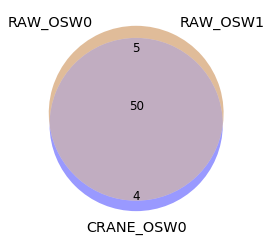

In [5]:
RAW_OSW0_files = set(all_data.loc[all_data.Type == 'RAW_OSW0', 'sample_key'].unique().tolist())
RAW_OSW1_files = set(all_data.loc[all_data.Type == 'RAW_OSW1', 'sample_key'].unique().tolist())
CRANE_OSW0_files = set(all_data.loc[all_data.Type == 'CRANE_OSW0', 'sample_key'].unique().tolist())
CRANE_OSW1_files = set(all_data.loc[all_data.Type == 'CRANE_OSW1', 'sample_key'].unique().tolist())
venn3([RAW_OSW0_files, RAW_OSW1_files, CRANE_OSW0_files], set_labels = ('RAW_OSW0', 'RAW_OSW1', 'CRANE_OSW0'))

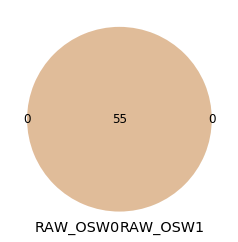

In [6]:
venn2([RAW_OSW0_files, RAW_OSW1_files], set_labels = ('RAW_OSW0', 'RAW_OSW1'))

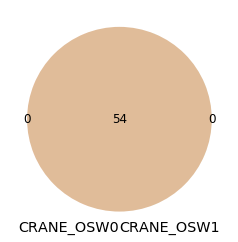

In [7]:
venn2([CRANE_OSW0_files, CRANE_OSW1_files], set_labels = ('CRANE_OSW0', 'CRANE_OSW1'))

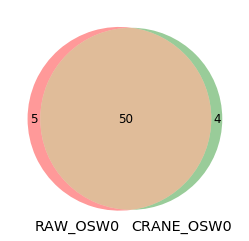

In [8]:
venn2([RAW_OSW0_files, CRANE_OSW0_files], set_labels = ('RAW_OSW0', 'CRANE_OSW0'))

In [9]:
CRANE_OSW0_files.difference(RAW_OSW0_files)

{'20171123_SWATH_Lu8_NoE_R2',
 '20171126_SWATH_LI7_NoE_R3',
 '20171129_SWATH_LI3_E_R2',
 '20171129_SWATH_LI4_E_R3'}

In [10]:
RAW_OSW0_files.difference(CRANE_OSW0_files)

{'20171123_SWATH_Lu3_NoE_R2',
 '20171126_SWATH_LI3_NoE_R2',
 '20171126_SWATH_LI5_NoE_R3',
 '20171129_SWATH_LI4_E_R2',
 '20171129_SWATH_LI7_E_R1'}

In [11]:
common_files = list(RAW_OSW0_files.intersection(CRANE_OSW0_files))
all_data = all_data.loc[all_data.sample_key.isin(common_files)]

## ECM peptide data

In [12]:
all_data['Protein_entry'] = all_data.Protein.str.split('|').str[1]
# Glycoproteins
Glycoproteins = pd.read_excel('ECM_protein_lists/Glycoproteins_ECM_protein_list.xlsx')
Glycoproteins_list = Glycoproteins.Entry.unique().tolist()
all_data.loc[all_data.Protein_entry.isin(Glycoproteins_list),'Gene_Type'] = 'Glycoproteins'
# Collagens
Collagens = pd.read_excel('ECM_protein_lists/Collagens_ECM_protein_list.xlsx')
Collagens_list = Collagens.Entry.unique().tolist()
all_data.loc[all_data.Protein_entry.isin(Collagens_list),'Gene_Type'] = 'Collagens'
# Proteoglycans
Proteoglycans = pd.read_excel('ECM_protein_lists/Proteoglycans_ECM_protein_list.xlsx')
Proteoglycans_list = Proteoglycans.Entry.unique().tolist()
all_data.loc[all_data.Protein_entry.isin(Proteoglycans_list),'Gene_Type'] = 'Proteoglycans'
# Affiliated
Affiliated = pd.read_excel('ECM_protein_lists/Affiliated_ECM_protein_list.xlsx')
Affiliated_list = Affiliated.Entry.unique().tolist()
all_data.loc[all_data.Protein_entry.isin(Affiliated_list),'Gene_Type'] = 'Affiliated'
# Regulators
Regulators = pd.read_excel('ECM_protein_lists/Regulators_ECM_protein_list.xlsx')
Regulators_list = Regulators.Entry.unique().tolist()
all_data.loc[all_data.Protein_entry.isin(Regulators_list),'Gene_Type'] = 'Regulators'
# Secreted factors
Secreted_factors = pd.read_excel('ECM_protein_lists/Secreted_factors_ECM_protein_list.xlsx')
Secreted_factors_list = Secreted_factors.Entry.unique().tolist()
all_data.loc[all_data.Protein_entry.isin(Secreted_factors_list),'Gene_Type'] = 'Secreted_factors'

### Median Normalization

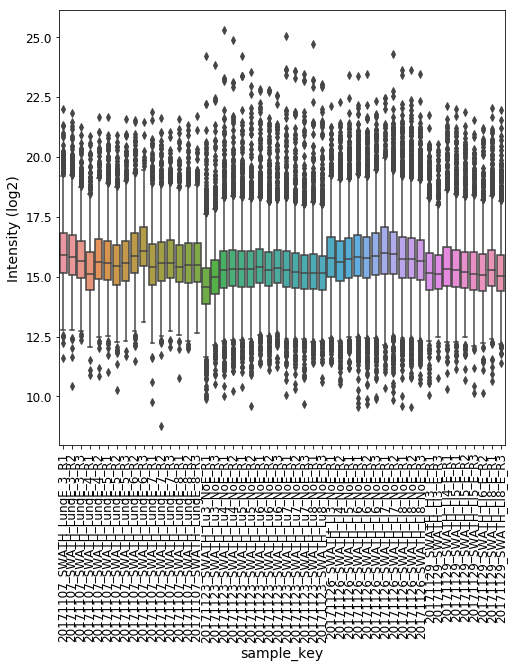

In [13]:
fig, axs = plt.subplots(1, 1, figsize=(8, 8))
sns.boxplot(
    data=all_data.loc[(all_data.Type == Reference)],
    x='sample_key',
    y='Intensity (log2)',
)
axs.tick_params('x', labelrotation=90)
plt.show()

In [14]:
all_data['Normalized Intensity (log2)'] = np.nan
columns = all_data.columns.values
normalised_data = pd.DataFrame(columns=columns)
type_list = all_data.Type.unique().tolist()
for typ in type_list:
    temp = all_data.loc[all_data.Type == typ]
    normalization_factor = temp.groupby('sample_key')['Intensity (log2)'].median().reset_index()
    normalization_factor = normalization_factor.rename(columns = {'Intensity (log2)': 'log2 Median Intensity'})
    ref_median = np.median(normalization_factor['log2 Median Intensity'].tolist())
    normalization_factor['normalization_factor'] = normalization_factor['log2 Median Intensity'] - ref_median
    temp = pd.merge(temp, normalization_factor, left_on='sample_key',right_on='sample_key',how='inner')
    temp['Normalized Intensity (log2)'] = temp['Intensity (log2)'] - temp['normalization_factor']
    normalised_data = normalised_data.append(temp[columns], ignore_index=True)

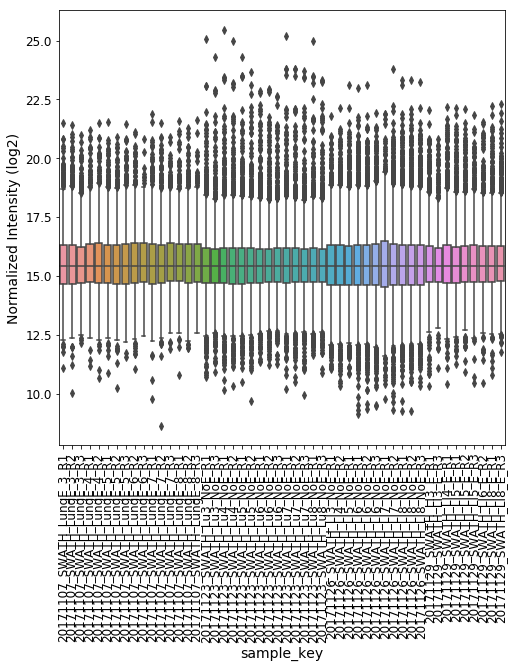

In [15]:
fig, axs = plt.subplots(1, 1, figsize=(8, 8))
sns.boxplot(
    data=normalised_data.loc[normalised_data.Type == Reference],
    x='sample_key',
    y='Normalized Intensity (log2)',
)
axs.tick_params('x', labelrotation=90)
plt.show()

In [16]:
# normalised_data = normalised_data.dropna(subset=['Normalized Intensity (log2)'])
normalised_data['Normalized Intensity'] = normalised_data['Normalized Intensity (log2)'].apply(np.exp2)

### Define colour palette

In [17]:
palette=sns.color_palette('Set2')
palette_less_ref=palette[1:]

## CV before normalization

In [18]:
variance = all_data.groupby(['Type', 'Specimen', 'Sample', 'Bio_Replicate', 'ModifiedPeptide'])['Intensity'].std().to_frame()
variance.reset_index(inplace=True)
variance = variance.rename(columns={'Intensity': 'Standard_deviation'})

In [19]:
mean = all_data.groupby(['Type', 'Specimen', 'Sample', 'Bio_Replicate', 'ModifiedPeptide'])['Intensity'].mean().to_frame()
mean.reset_index(inplace=True)
mean = mean.rename(columns={'Intensity': 'Mean'})

In [20]:
all_peptide_cv = variance.merge(mean, how = 'inner')
all_peptide_cv = all_peptide_cv.dropna()
all_peptide_cv['CV'] = 100* all_peptide_cv['Standard_deviation'] / all_peptide_cv['Mean']
all_peptide_cv['CV (log10)'] = all_peptide_cv.CV.apply(np.log10)
all_peptide_cv['Group_by'] = all_peptide_cv['Specimen'] + '_' + all_peptide_cv['Sample'] + '_' + all_peptide_cv['Bio_Replicate'].astype(str)
all_peptide_cv = all_peptide_cv.sort_values(by=['Group_by', 'Type'])

Text(0.5,0.98,'Peptide CV Before Normalization')

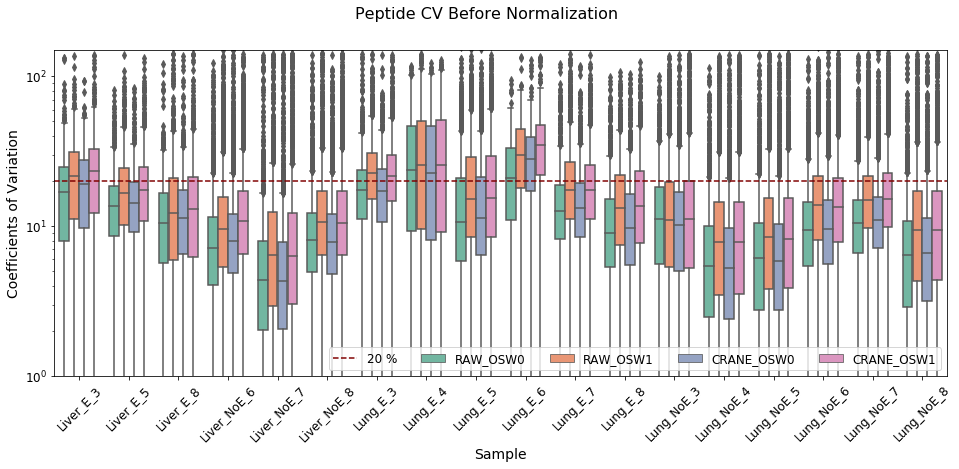

In [21]:
fig, axs = plt.subplots(1, 1, figsize=(16, 6))
sns.boxplot(
    data=all_peptide_cv,
    x='Group_by',
    y='CV',
    hue='Type',
    hue_order=hue_order,
    palette=palette,
    ax=axs,
)

axs.set_xlabel('Sample')
axs.set_ylabel('Coefficients of Variation')
axs.set_yscale('log')
axs.axhline(20, ls='--', c='maroon', label='20 %')
axs.set_ylim((1, 150))
axs.tick_params('x', labelrotation=45) 
plt.legend(loc='lower right', ncol = 5)
plt.suptitle('Peptide CV Before Normalization')
# plt.savefig('Figures_for_paper/Matrisome_Peptide_CV_before_normalization.pdf', dpi=300, format='pdf', bbox_inches='tight')

## CV after normalization

In [22]:
variance2 = normalised_data.groupby(['Type', 'Specimen', 'Sample', 'Bio_Replicate', 'ModifiedPeptide'])['Normalized Intensity'].std().to_frame()
variance2.reset_index(inplace=True)
variance2 = variance2.rename(columns={'Normalized Intensity': 'Standard_deviation'})

In [23]:
mean2 = normalised_data.groupby(['Type', 'Specimen', 'Sample', 'Bio_Replicate', 'ModifiedPeptide'])['Normalized Intensity'].mean().to_frame()
mean2.reset_index(inplace=True)
mean2 = mean2.rename(columns={'Normalized Intensity': 'Mean'})

In [24]:
all_peptide_cv2 = variance2.merge(mean2, how = 'inner')
all_peptide_cv2 = all_peptide_cv2.dropna()
all_peptide_cv2['CV'] = 100* all_peptide_cv2['Standard_deviation'] / all_peptide_cv2['Mean']
all_peptide_cv2['CV (log10)'] = all_peptide_cv2.CV.apply(np.log10)
all_peptide_cv2['Group_by'] = all_peptide_cv2['Specimen'] + '_' + all_peptide_cv2['Sample'] + '_' +all_peptide_cv2['Bio_Replicate'].astype(str)
all_peptide_cv2 = all_peptide_cv2.sort_values(by=['Group_by', 'Type'])

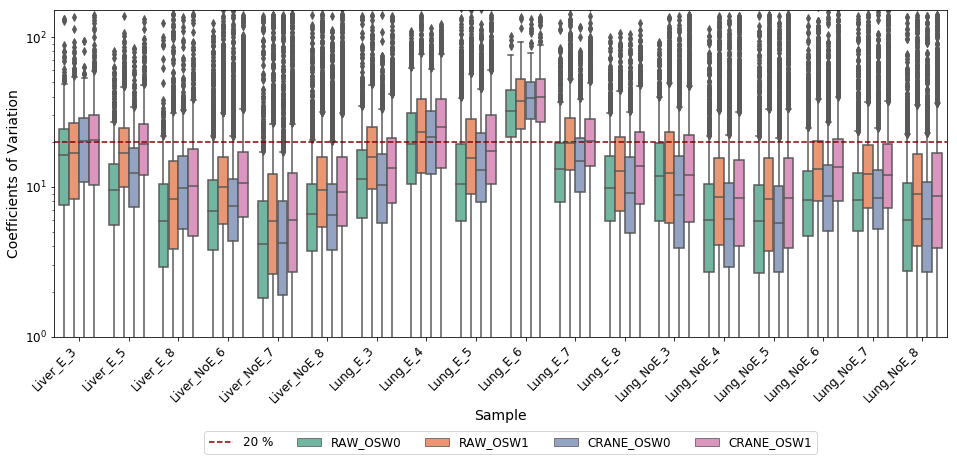

In [25]:
fig, axs = plt.subplots(1, 1, figsize=(16, 6))
sns.boxplot(
    data=all_peptide_cv2,
    x='Group_by',
    y='CV',
    hue='Type',
    hue_order=hue_order,
    palette=palette,
    ax=axs,
)
# axs.set_title('Peptide Coefficients of Variation')
axs.set_xlabel('Sample')
axs.set_ylabel('Coefficients of Variation')
axs.set_yscale('log')
axs.axhline(20, ls='--', c='maroon', label='20 %')
axs.set_ylim((1, 150))
axs.tick_params('x', labelrotation=45) 
for tick in axs.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("right")
axs.legend(bbox_to_anchor=(0.25,-0.08), loc="upper left",  bbox_transform=fig.transFigure, ncol = 5)
plt.savefig('figures/Matrisome_Peptide_CV.eps', dpi=350, format='eps', bbox_inches='tight')

## Compare number of peptide IDs

In [26]:
peptide_count = normalised_data.groupby(['Type', 'Specimen', 'Sample', 'Bio_Replicate', 'Tech_Replicate'])[['Intensity (log2)']].count().reset_index()
peptide_count.rename(columns={'Intensity (log2)': 'peptide_count'}, inplace=True)
peptide_count['Group_by'] = peptide_count['Specimen'] + '_' + peptide_count['Sample'] + '_' +peptide_count['Bio_Replicate'].astype(str)
peptide_count = peptide_count.sort_values(by=['Group_by', 'Type', 'Tech_Replicate'])
peptide_count.head()

,Type,Specimen,Sample,Bio_Replicate,Tech_Replicate,peptide_count,Group_by
0,CRANE_OSW0,Liver,E,3,1,1785,Liver_E_3
1,CRANE_OSW0,Liver,E,3,3,1194,Liver_E_3
50,CRANE_OSW1,Liver,E,3,1,1770,Liver_E_3
51,CRANE_OSW1,Liver,E,3,3,1277,Liver_E_3
100,RAW_OSW0,Liver,E,3,1,1590,Liver_E_3


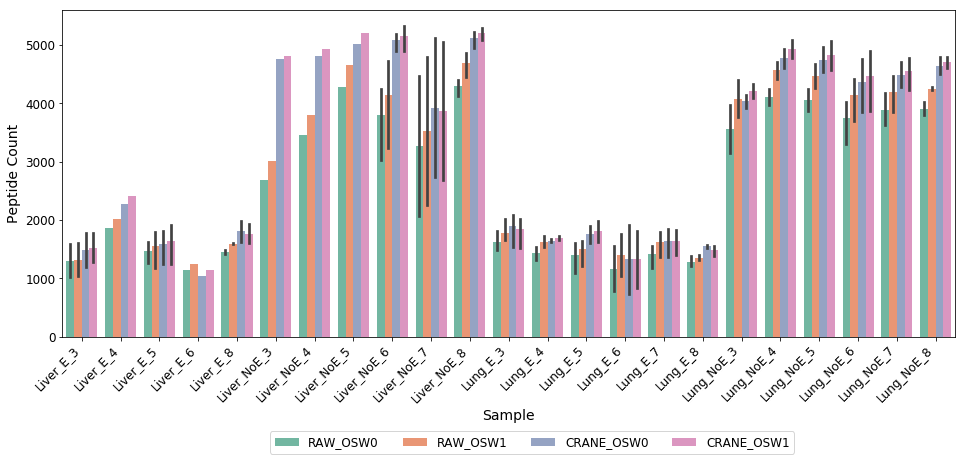

In [27]:
fig, axs = plt.subplots(1, 1, figsize=(16, 6))
sns.barplot(
    data=peptide_count,
    x='Group_by',
    y='peptide_count',
    hue='Type',
    hue_order=hue_order,
    palette=palette,
    ax=axs,
)
# axs.set_title('Peptide Count')
axs.set_xlabel('Sample')
axs.set_ylabel('Peptide Count')
axs.legend(loc='upper left')
axs.tick_params('x', labelrotation=45)
for tick in axs.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("right")
axs.legend(bbox_to_anchor=(0.3,-0.08), loc="upper left",  bbox_transform=fig.transFigure, ncol = 4)
plt.savefig('figures/Matrisome_Peptide_Count.eps', dpi=350, format='eps', bbox_inches='tight')

In [28]:
Peptide_Detection_Improvement = pd.DataFrame(columns=['Type', 'Specimen', 'Sample', 'Bio_Replicate', 'Tech_Replicate', 'Ref_Peptide_Count', 'Peptide_Count', 'Peptide_Detection_Improvement'])
peptide_count['Group_by'] = peptide_count['Group_by'] + '_' + peptide_count['Tech_Replicate'].astype(str)
group_list = peptide_count.Group_by.unique().tolist()
for group in group_list:
    temp = peptide_count.loc[peptide_count.Group_by == group]
    if temp.loc[temp.Type == Reference].shape[0] > 0:
        ref_pep_count = temp.loc[temp.Type == Reference]['peptide_count'].values.tolist()[0]
        type_list = temp.Type.unique().tolist()
        for typ in type_list:
            if typ != Reference:
                temp2 = temp.loc[temp.Type == typ]
                if temp2.shape[0] > 0:
                    pep_count = temp2['peptide_count'].values.tolist()[0]
                    peptide_improvement = (pep_count - ref_pep_count)/ref_pep_count * 100
                    Peptide_Detection_Improvement = Peptide_Detection_Improvement.append(
                        {
                            'Type': typ,
                            'Specimen' :temp.Specimen.tolist()[0],
                            'Sample':temp.Sample.tolist()[0],
                            'Bio_Replicate':temp.Bio_Replicate.tolist()[0],
                            'Tech_Replicate':temp.Tech_Replicate.tolist()[0],
                            'Ref_Peptide_Count': ref_pep_count,
                            'Peptide_Count': pep_count,
                            'Peptide_Detection_Improvement':peptide_improvement
                        },
                        ignore_index=True
                    )
Peptide_Detection_Improvement['Group_by'] = Peptide_Detection_Improvement['Specimen'] + '_' + Peptide_Detection_Improvement['Sample'] + '_' + Peptide_Detection_Improvement['Bio_Replicate'].astype(str)

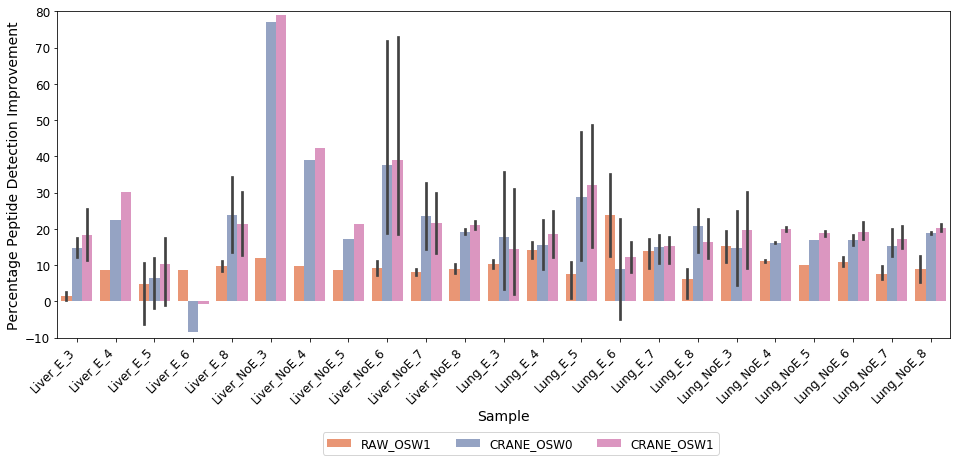

In [29]:
fig, axs = plt.subplots(1, 1, figsize=(16, 6))

sns.barplot(
    data=Peptide_Detection_Improvement,
    x='Group_by',
    y='Peptide_Detection_Improvement',
    hue='Type',
    hue_order=hue_order_less_ref,
    palette=palette_less_ref,
    ax=axs,
)
axs.set_ylim((-10, 80))
axs.set_xlabel('Sample')
axs.set_ylabel('Percentage Peptide Detection Improvement')
axs.tick_params('x', labelrotation=45)
for tick in axs.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("right")
axs.legend(bbox_to_anchor=(0.35,-0.08), loc="upper left",  bbox_transform=fig.transFigure, ncol = 4)
plt.savefig('figures/Matrisome_Peptide_Detection_Improvement.eps', dpi=350, format='eps', bbox_inches='tight')

## Compare ECM number of peptide IDs

In [30]:
ECM_data = normalised_data.loc[normalised_data.Gene_Type.isin(['Glycoproteins', 'Collagens', 'Proteoglycans'])]
ECM_data.head()

,Type,sample_key,Specimen,Sample,Bio_Replicate,Tech_Replicate,Protein,Peptide,ModifiedPeptide,Intensity,Intensity (log2),Protein_entry,Gene_Type,Normalized Intensity (log2),Normalized Intensity
173,CRANE_OSW0,20171107_SWATH_LungE_3_R1,Lung,E,3,1,sp|A6H584|CO6A5_MOUSE,AINKYPGRDLQAK,AINKYPGRDLQAK,NaN,NaN,A6H584,Collagens,NaN,NaN
174,CRANE_OSW0,20171107_SWATH_LungE_3_R1,Lung,E,3,1,sp|A6H584|CO6A5_MOUSE,FLKPFIYSVR,FLKPFIYSVR,NaN,NaN,A6H584,Collagens,NaN,NaN
175,CRANE_OSW0,20171107_SWATH_LungE_3_R1,Lung,E,3,1,sp|A6H584|CO6A5_MOUSE,KAQGVPQIAVLVTHR,KAQGVPQIAVLVTHR,NaN,NaN,A6H584,Collagens,NaN,NaN
176,CRANE_OSW0,20171107_SWATH_LungE_3_R1,Lung,E,3,1,sp|A6H584|CO6A5_MOUSE,LESYLPGILEDITSIR,LESYLPGILEDITSIR,NaN,NaN,A6H584,Collagens,NaN,NaN
177,CRANE_OSW0,20171107_SWATH_LungE_3_R1,Lung,E,3,1,sp|A6H584|CO6A5_MOUSE,NAGVPQTLVVITSSSPR,NAGVPQTLVVITSSSPR,NaN,NaN,A6H584,Collagens,NaN,NaN


In [31]:
ECM_peptide_count = ECM_data.groupby(['Type', 'Specimen', 'Sample', 'Bio_Replicate', 'Tech_Replicate'])[['Intensity (log2)']].count().reset_index()
ECM_peptide_count.rename(columns={'Intensity (log2)': 'peptide_count'}, inplace=True)
ECM_peptide_count['Group_by'] = ECM_peptide_count['Specimen'] + '_' + ECM_peptide_count['Sample'] + '_' +ECM_peptide_count['Bio_Replicate'].astype(str)
ECM_peptide_count = ECM_peptide_count.sort_values(by=['Group_by', 'Type', 'Tech_Replicate'])
ECM_peptide_count.head()

,Type,Specimen,Sample,Bio_Replicate,Tech_Replicate,peptide_count,Group_by
0,CRANE_OSW0,Liver,E,3,1,209,Liver_E_3
1,CRANE_OSW0,Liver,E,3,3,149,Liver_E_3
50,CRANE_OSW1,Liver,E,3,1,202,Liver_E_3
51,CRANE_OSW1,Liver,E,3,3,152,Liver_E_3
100,RAW_OSW0,Liver,E,3,1,194,Liver_E_3


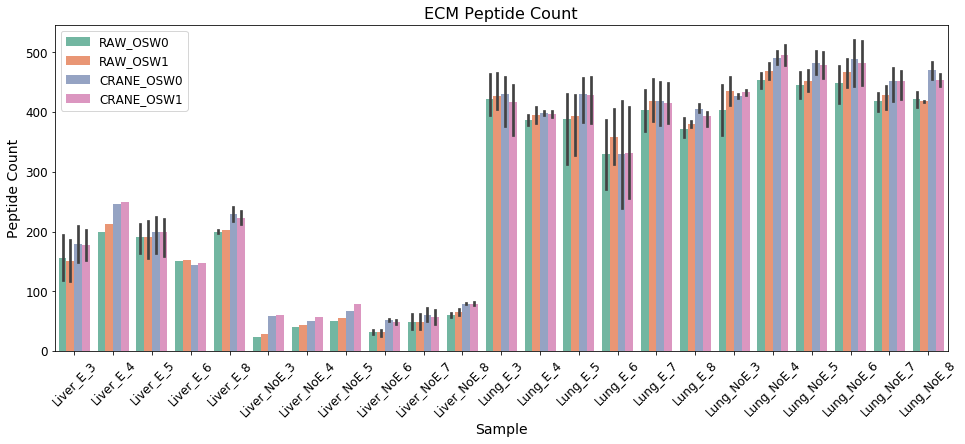

In [32]:
fig, axs = plt.subplots(1, 1, figsize=(16, 6))
sns.barplot(
    data=ECM_peptide_count,
    x='Group_by',
    y='peptide_count',
    hue='Type',
    hue_order=hue_order,
    palette=palette,
    ax=axs,
)
axs.set_title('ECM Peptide Count')
axs.set_xlabel('Sample')
axs.set_ylabel('Peptide Count')
axs.legend(loc='upper left')
axs.tick_params('x', labelrotation=45)
plt.show()

In [33]:
ECM_Peptide_Detection_Improvement = pd.DataFrame(columns=['Type', 'Specimen', 'Sample', 'Bio_Replicate', 'Tech_Replicate', 'Ref_Peptide_Count', 'Peptide_Count', 'Peptide_Detection_Improvement'])
ECM_peptide_count['Group_by'] = ECM_peptide_count['Group_by'] + '_' + ECM_peptide_count['Tech_Replicate'].astype(str)
group_list = ECM_peptide_count.Group_by.unique().tolist()
for group in group_list:
    temp = ECM_peptide_count.loc[ECM_peptide_count.Group_by == group]
    if temp.loc[temp.Type == Reference].shape[0] > 0:
        ref_pep_count = temp.loc[temp.Type == Reference]['peptide_count'].values.tolist()[0]
        type_list = temp.Type.unique().tolist()
        for typ in type_list:
            if typ != Reference:
                temp2 = temp.loc[temp.Type == typ]
                if temp2.shape[0] > 0:
                    pep_count = temp2['peptide_count'].values.tolist()[0]
                    peptide_improvement = (pep_count - ref_pep_count)/ref_pep_count * 100
                    ECM_Peptide_Detection_Improvement = ECM_Peptide_Detection_Improvement.append(
                        {
                            'Type': typ,
                            'Specimen' :temp.Specimen.tolist()[0],
                            'Sample':temp.Sample.tolist()[0],
                            'Bio_Replicate':temp.Bio_Replicate.tolist()[0],
                            'Tech_Replicate':temp.Tech_Replicate.tolist()[0],
                            'Ref_Peptide_Count': ref_pep_count,
                            'Peptide_Count': pep_count,
                            'Peptide_Detection_Improvement':peptide_improvement
                        },
                        ignore_index=True
                    )
ECM_Peptide_Detection_Improvement['Group_by'] = ECM_Peptide_Detection_Improvement['Specimen'] + '_' + ECM_Peptide_Detection_Improvement['Sample'] + '_' + ECM_Peptide_Detection_Improvement['Bio_Replicate'].astype(str)

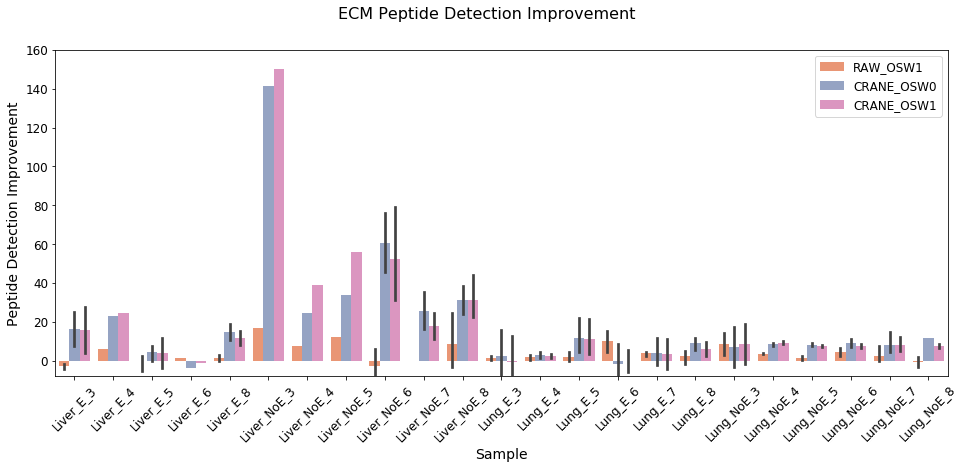

In [34]:
fig, axs = plt.subplots(1, 1, figsize=(16, 6))

sns.barplot(
    data=ECM_Peptide_Detection_Improvement,
    x='Group_by',
    y='Peptide_Detection_Improvement',
    hue='Type',
    hue_order=hue_order_less_ref,
    palette=palette_less_ref,
    ax=axs,
)
axs.set_ylim((-8, 160))
axs.set_xlabel('Sample')
axs.set_ylabel('Peptide Detection Improvement')
axs.tick_params('x', labelrotation=45)
axs.legend(loc='upper right')
plt.suptitle('ECM Peptide Detection Improvement')
plt.show()

## Compare ECM-Associated number of peptide IDs

In [35]:
ECM_associated_data = normalised_data.loc[normalised_data.Gene_Type.isin(['Affiliated', 'Regulators', 'Secreted_factors'])]
ECM_associated_data.head()

,Type,sample_key,Specimen,Sample,Bio_Replicate,Tech_Replicate,Protein,Peptide,ModifiedPeptide,Intensity,Intensity (log2),Protein_entry,Gene_Type,Normalized Intensity (log2),Normalized Intensity
187,CRANE_OSW0,20171107_SWATH_LungE_3_R1,Lung,E,3,1,sp|A6X935|ITIH4_MOUSE,AHGGTNINNAVLLAVELLDR,AHGGTNINNAVLLAVELLDR,7128.0,12.799282,A6X935,Regulators,12.342058,5191.940076
188,CRANE_OSW0,20171107_SWATH_LungE_3_R1,Lung,E,3,1,sp|A6X935|ITIH4_MOUSE,LFVDPSQGLEVTGK,LFVDPSQGLEVTGK,NaN,NaN,A6X935,Regulators,NaN,NaN
189,CRANE_OSW0,20171107_SWATH_LungE_3_R1,Lung,E,3,1,sp|A6X935|ITIH4_MOUSE,TLFSVLPGLK,TLFSVLPGLK,NaN,NaN,A6X935,Regulators,NaN,NaN
190,CRANE_OSW0,20171107_SWATH_LungE_3_R1,Lung,E,3,1,sp|A6X935|ITIH4_MOUSE,VQGVDYLATR,VQGVDYLATR,NaN,NaN,A6X935,Regulators,NaN,NaN
191,CRANE_OSW0,20171107_SWATH_LungE_3_R1,Lung,E,3,1,sp|A6X935|ITIH4_MOUSE,VTIGLLSLDDPQR,VTIGLLSLDDPQR,NaN,NaN,A6X935,Regulators,NaN,NaN


In [36]:
ECM_associated_peptide_count = ECM_associated_data.groupby(['Type', 'Specimen', 'Sample', 'Bio_Replicate', 'Tech_Replicate'])[['Intensity (log2)']].count().reset_index()
ECM_associated_peptide_count.rename(columns={'Intensity (log2)': 'peptide_count'}, inplace=True)
ECM_associated_peptide_count['Group_by'] = ECM_associated_peptide_count['Specimen'] + '_' + ECM_associated_peptide_count['Sample'] + '_' +ECM_associated_peptide_count['Bio_Replicate'].astype(str)
ECM_associated_peptide_count = ECM_associated_peptide_count.sort_values(by=['Group_by', 'Type', 'Tech_Replicate'])
ECM_associated_peptide_count.head()

,Type,Specimen,Sample,Bio_Replicate,Tech_Replicate,peptide_count,Group_by
0,CRANE_OSW0,Liver,E,3,1,29,Liver_E_3
1,CRANE_OSW0,Liver,E,3,3,25,Liver_E_3
50,CRANE_OSW1,Liver,E,3,1,30,Liver_E_3
51,CRANE_OSW1,Liver,E,3,3,25,Liver_E_3
100,RAW_OSW0,Liver,E,3,1,26,Liver_E_3


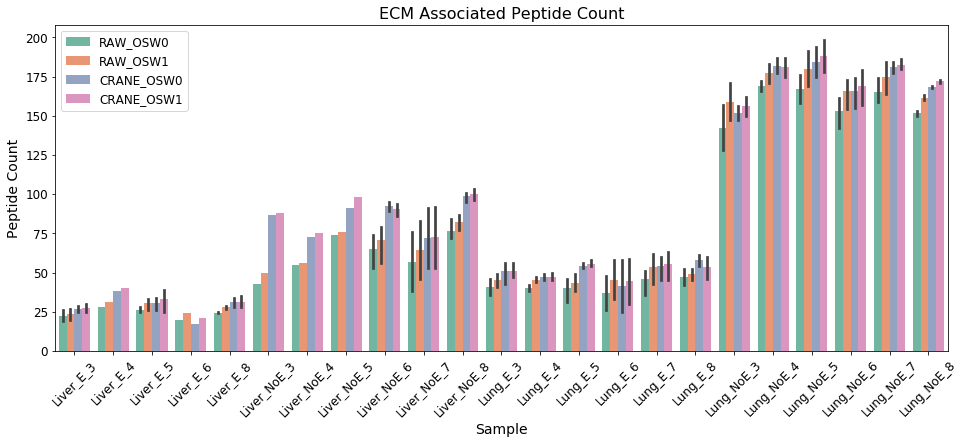

In [37]:
fig, axs = plt.subplots(1, 1, figsize=(16, 6))
sns.barplot(
    data=ECM_associated_peptide_count,
    x='Group_by',
    y='peptide_count',
    hue='Type',
    hue_order=hue_order,
    palette=palette,
    ax=axs,
)
axs.set_title('ECM Associated Peptide Count')
axs.set_xlabel('Sample')
axs.set_ylabel('Peptide Count')
axs.legend(loc='upper left')
axs.tick_params('x', labelrotation=45)
plt.show()

In [38]:
ECM_Associated_Peptide_Detection_Improvement = pd.DataFrame(columns=['Type', 'Specimen', 'Sample', 'Bio_Replicate', 'Tech_Replicate', 'Ref_Peptide_Count', 'Peptide_Count', 'Peptide_Detection_Improvement'])
ECM_associated_peptide_count['Group_by'] = ECM_associated_peptide_count['Group_by'] + '_' + ECM_associated_peptide_count['Tech_Replicate'].astype(str)
group_list = ECM_associated_peptide_count.Group_by.unique().tolist()
for group in group_list:
    temp = ECM_associated_peptide_count.loc[ECM_associated_peptide_count.Group_by == group]
    if temp.loc[temp.Type == Reference].shape[0] > 0:
        ref_pep_count = temp.loc[temp.Type == Reference]['peptide_count'].values.tolist()[0]
        type_list = temp.Type.unique().tolist()
        for typ in type_list:
            if typ != Reference:
                temp2 = temp.loc[temp.Type == typ]
                if temp2.shape[0] > 0:
                    pep_count = temp2['peptide_count'].values.tolist()[0]
                    peptide_improvement = (pep_count - ref_pep_count)/ref_pep_count * 100
                    ECM_Associated_Peptide_Detection_Improvement = ECM_Associated_Peptide_Detection_Improvement.append(
                        {
                            'Type': typ,
                            'Specimen' :temp.Specimen.tolist()[0],
                            'Sample':temp.Sample.tolist()[0],
                            'Bio_Replicate':temp.Bio_Replicate.tolist()[0],
                            'Tech_Replicate':temp.Tech_Replicate.tolist()[0],
                            'Ref_Peptide_Count': ref_pep_count,
                            'Peptide_Count': pep_count,
                            'Peptide_Detection_Improvement':peptide_improvement
                        },
                        ignore_index=True
                    )
ECM_Associated_Peptide_Detection_Improvement['Group_by'] = ECM_Associated_Peptide_Detection_Improvement['Specimen'] + '_' + ECM_Peptide_Detection_Improvement['Sample'] + '_' + ECM_Associated_Peptide_Detection_Improvement['Bio_Replicate'].astype(str)

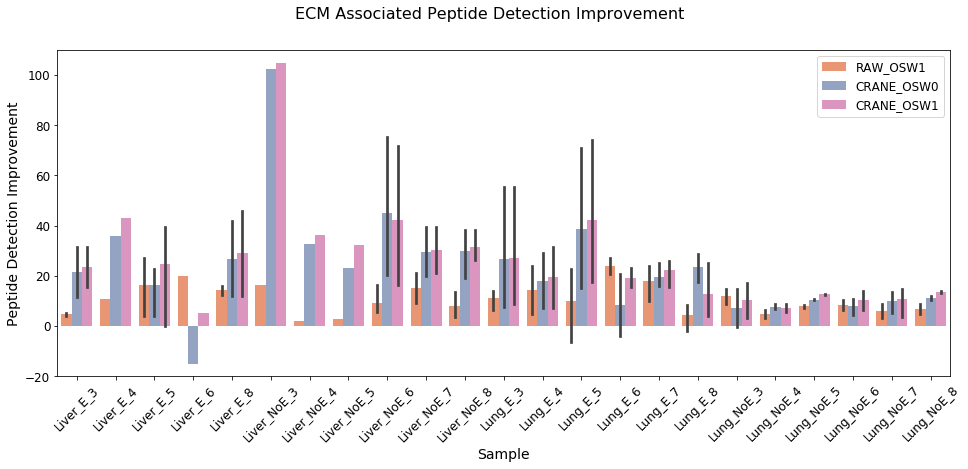

In [39]:
fig, axs = plt.subplots(1, 1, figsize=(16, 6))

sns.barplot(
    data=ECM_Associated_Peptide_Detection_Improvement,
    x='Group_by',
    y='Peptide_Detection_Improvement',
    hue='Type',
    hue_order=hue_order_less_ref,
    palette=palette_less_ref,
    ax=axs,
)
axs.set_ylim((-20, 110))
axs.set_xlabel('Sample')
axs.set_ylabel('Peptide Detection Improvement')
axs.tick_params('x', labelrotation=45)
axs.legend(loc='upper right')
plt.suptitle('ECM Associated Peptide Detection Improvement')
plt.show()

## Store peptide count stats

In [40]:
median_peptide_count = peptide_count.groupby(['Type', 'Specimen', 'Sample'])[['peptide_count']].median().reset_index()
median_peptide_count.rename(columns={'peptide_count': 'Median_Peptide_Count'}, inplace=True)
peptide_stats = median_peptide_count

Median_Peptide_Detection_Improvement = Peptide_Detection_Improvement.groupby(['Type', 'Specimen', 'Sample'])[['Peptide_Detection_Improvement']].median().reset_index()
Median_Peptide_Detection_Improvement.rename(columns={'Peptide_Detection_Improvement': 'Median_Peptide_Detection_Improvement'}, inplace=True)
peptide_stats = peptide_stats.merge(Median_Peptide_Detection_Improvement, how = 'left')

median_ECM_peptide_count = ECM_peptide_count.groupby(['Type', 'Specimen', 'Sample'])[['peptide_count']].median().reset_index()
median_ECM_peptide_count.rename(columns={'peptide_count': 'Median_ECM_Peptide_Count'}, inplace=True)
peptide_stats = peptide_stats.merge(median_ECM_peptide_count, how = 'left')

Median_ECM_Peptide_Detection_Improvement = ECM_Peptide_Detection_Improvement.groupby(['Type', 'Specimen', 'Sample'])[['Peptide_Detection_Improvement']].median().reset_index()
Median_ECM_Peptide_Detection_Improvement.rename(columns={'Peptide_Detection_Improvement': 'Median_ECM_Peptide_Detection_Improvement'}, inplace=True)
peptide_stats = peptide_stats.merge(Median_ECM_Peptide_Detection_Improvement, how = 'left')

median_ECM_associated_peptide_count = ECM_associated_peptide_count.groupby(['Type', 'Specimen', 'Sample'])[['peptide_count']].median().reset_index()
median_ECM_associated_peptide_count.rename(columns={'peptide_count': 'Median_ECM_Associated_Peptide_Count'}, inplace=True)
peptide_stats = peptide_stats.merge(median_ECM_associated_peptide_count, how = 'left')

Median_ECM_Associated_Peptide_Detection_Improvement = ECM_Associated_Peptide_Detection_Improvement.groupby(['Type', 'Specimen', 'Sample'])[['Peptide_Detection_Improvement']].median().reset_index()
Median_ECM_Associated_Peptide_Detection_Improvement.rename(columns={'Peptide_Detection_Improvement': 'Median_ECM_Associated_Peptide_Detection_Improvement'}, inplace=True)
peptide_stats = peptide_stats.merge(Median_ECM_Associated_Peptide_Detection_Improvement, how = 'left')
peptide_stats.head()

,Type,Specimen,Sample,Median_Peptide_Count,Median_Peptide_Detection_Improvement,Median_ECM_Peptide_Count,Median_ECM_Peptide_Detection_Improvement,Median_ECM_Associated_Peptide_Count,Median_ECM_Associated_Peptide_Detection_Improvement
0,CRANE_OSW0,Liver,E,1688.0,12.264151,210.0,7.731959,29.0,21.428571
1,CRANE_OSW0,Liver,NoE,5022.0,19.922443,58.0,35.135135,91.0,32.727273
2,CRANE_OSW0,Lung,E,1645.0,17.329875,407.5,5.133485,54.0,20.416667
3,CRANE_OSW0,Lung,NoE,4573.0,16.783298,468.5,8.815074,174.5,10.342395
4,CRANE_OSW1,Liver,E,1769.0,14.721141,213.0,8.121827,30.0,31.578947


In [41]:
peptide_stats['Type_Sort'] = np.nan
peptide_stats.loc[peptide_stats.Type == 'RAW_OSW0', 'Type_Sort'] = 0
peptide_stats.loc[peptide_stats.Type == 'RAW_OSW1', 'Type_Sort'] = 1
peptide_stats.loc[peptide_stats.Type == 'CRANE_OSW0', 'Type_Sort'] = 2
peptide_stats.loc[peptide_stats.Type == 'CRANE_OSW1', 'Type_Sort'] = 3
peptide_stats = peptide_stats.sort_values(by=['Specimen', 'Sample', 'Type_Sort'])
peptide_stats[
    ['Specimen', 'Sample', 'Type', 'Median_Peptide_Count', 'Median_Peptide_Detection_Improvement', 'Median_ECM_Peptide_Count', 'Median_ECM_Peptide_Detection_Improvement', 'Median_ECM_Associated_Peptide_Count', 'Median_ECM_Associated_Peptide_Detection_Improvement']
].round(1).to_csv("peptide_n_protein_data/stats/Matrisome_Peptide_ID_data.csv")

## Generate files for Diffacto

In [42]:
file_list = normalised_data.sample_key.unique().tolist()
file_details = pd.DataFrame(file_list, columns =['FileName'])
file_details['Tech_Replicate'] = file_details.FileName.str[-1]
file_details.loc[file_details.FileName.str.contains('NoE'), 'Sample'] = 'NoE'
file_details.loc[~file_details.FileName.str.contains('NoE'), 'Sample'] = 'E'
file_details.loc[file_details.FileName.str.contains('Lu'), 'Specimen'] = 'Lung'
file_details.loc[~file_details.FileName.str.contains('Lu'), 'Specimen'] = 'Liver'
file_details['Bio_Replicate'] = file_details.FileName.str.split('_').str[2].str[-1]
file_details.loc[(file_details.Sample == 'E') & (file_details.Specimen == 'Lung'), 'Bio_Replicate'] = file_details.FileName.str.split('_').str[3]
file_details.head()

,FileName,Tech_Replicate,Sample,Specimen,Bio_Replicate
0,20171107_SWATH_LungE_3_R1,1,E,Lung,3
1,20171107_SWATH_LungE_3_R2,2,E,Lung,3
2,20171107_SWATH_LungE_3_R3,3,E,Lung,3
3,20171107_SWATH_LungE_4_R1,1,E,Lung,4
4,20171107_SWATH_LungE_4_R2,2,E,Lung,4


In [43]:
# #Generate sample information file
samples_list = file_details[['FileName', 'FileName']]
samples_list.to_csv('peptide_n_protein_data/diffacto_files/samples.lst', header=None, index=None, sep='\t')
#Generate peptide information files and run Diffacto
type_list = normalised_data.Type.unique().tolist()
for typ in type_list:
    temp = normalised_data.loc[normalised_data.Type == typ]
    # Create the peptide matrix
    # Remove one hit wonders
    temp = temp.dropna(subset=['Normalized Intensity'])
    temp = temp[temp.groupby(['sample_key', 'Protein'])['Normalized Intensity'].transform('count') > 1]
    # reshape the dataframe to be a 2D matrix (wide format)
    rows = ['sample_key']
    cols = ['ModifiedPeptide', 'Protein']
    temp_intensity = temp[rows + cols + ['Normalized Intensity']].set_index(rows + cols).unstack(rows)
    temp_intensity = temp_intensity.loc[temp_intensity.notnull().sum(axis = 1) > 1, :]
    temp_intensity = temp_intensity['Normalized Intensity'].reset_index()
    peptide_file_name = 'peptide_n_protein_data/diffacto_files/{}_peptides.csv'.format(typ)
    temp_intensity.to_csv(peptide_file_name, index = False)
    # Run Diffacto
    command = 'python diffacto/run_diffacto.py -i peptide_n_protein_data/diffacto_files/{}_peptides.csv -samples peptide_n_protein_data/diffacto_files/samples.lst -out peptide_n_protein_data/diffacto_files/{}_protein.txt -impute_threshold 1.1'.format(typ, typ)# '-log2 True' needs to be added if log2 data is used
    os.system(command)

In [44]:
#Read in protein data generated by Diffacto
all_protein_data = pd.DataFrame(columns=['Type', 'sample_key', 'Protein', 'N.Pept', 'Q.Pept', 'S/N', 'P(PECA)', 'Intensity'])
type_list = normalised_data.Type.unique().tolist()
for typ in type_list:    
    protein_file_name = 'peptide_n_protein_data/diffacto_files/{}_protein.txt'.format(typ)
    protain = pd.read_csv(protein_file_name, sep='\t')
    protain = protain.set_index(['Protein', 'N.Pept', 'Q.Pept', 'S/N', 'P(PECA)']).stack().reset_index()
    protain.rename(columns={'level_5': 'sample_key', 0:'Intensity'}, inplace=True)
    protain['Type'] = typ
    all_protein_data = all_protein_data.append(protain, ignore_index=True)
all_protein_data = pd.merge(all_protein_data, file_details, left_on='sample_key',right_on='FileName',how='inner')
all_protein_data.drop(columns=['S/N', 'N.Pept', 'Q.Pept', 'P(PECA)', 'FileName'], inplace=True)
all_protein_data['Intensity (log2)'] = all_protein_data.Intensity.apply(np.log2)
all_protein_data.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,Intensity,Protein,Type,sample_key,Tech_Replicate,Sample,Specimen,Bio_Replicate,Intensity (log2)
0,0.891020,sp|A2AJL3|FGGY_MOUSE,CRANE_OSW0,20171126_SWATH_LI3_NoE_R1,1,NoE,Liver,3,-0.166470
1,0.554723,sp|A2AS89|SPEB_MOUSE,CRANE_OSW0,20171126_SWATH_LI3_NoE_R1,1,NoE,Liver,3,-0.850161
2,0.862957,sp|A2ATU0|DHTK1_MOUSE,CRANE_OSW0,20171126_SWATH_LI3_NoE_R1,1,NoE,Liver,3,-0.212640
3,0.717242,sp|A6X935|ITIH4_MOUSE,CRANE_OSW0,20171126_SWATH_LI3_NoE_R1,1,NoE,Liver,3,-0.479468
4,0.236017,sp|E9PV24-2|FIBA_MOUSE,CRANE_OSW0,20171126_SWATH_LI3_NoE_R1,1,NoE,Liver,3,-2.083039


## CV of Protain Data
If sample group data is given to diffacto, we cannot calculate the CV of protein data because deffecto usues data from all three replicates to calculate protein intensities (in the final step Deffecto averages the protein intensities across replicates, to give a consensus).

In [45]:
protein_variance = all_protein_data.groupby(['Type', 'Specimen', 'Sample', 'Bio_Replicate', 'Protein'])['Intensity'].std().to_frame()
protein_variance.reset_index(inplace=True)
protein_variance = protein_variance.rename(columns={'Intensity': 'Standard_deviation'})

In [46]:
protein_mean = all_protein_data.groupby(['Type', 'Specimen', 'Sample', 'Bio_Replicate', 'Protein'])['Intensity'].mean().to_frame()
protein_mean.reset_index(inplace=True)
protein_mean = protein_mean.rename(columns={'Intensity': 'Mean'})

In [47]:
all_protein_cv = protein_variance.merge(protein_mean, how = 'inner')
all_protein_cv = all_protein_cv.dropna()
all_protein_cv['CV'] = 100* all_protein_cv['Standard_deviation'] / all_protein_cv['Mean']
all_protein_cv['CV (log10)'] = all_protein_cv.CV.apply(np.log10)
all_protein_cv['Group_by'] = all_protein_cv['Specimen'] + '_' + all_protein_cv['Sample'] + '_' + all_protein_cv['Bio_Replicate'].astype(str)

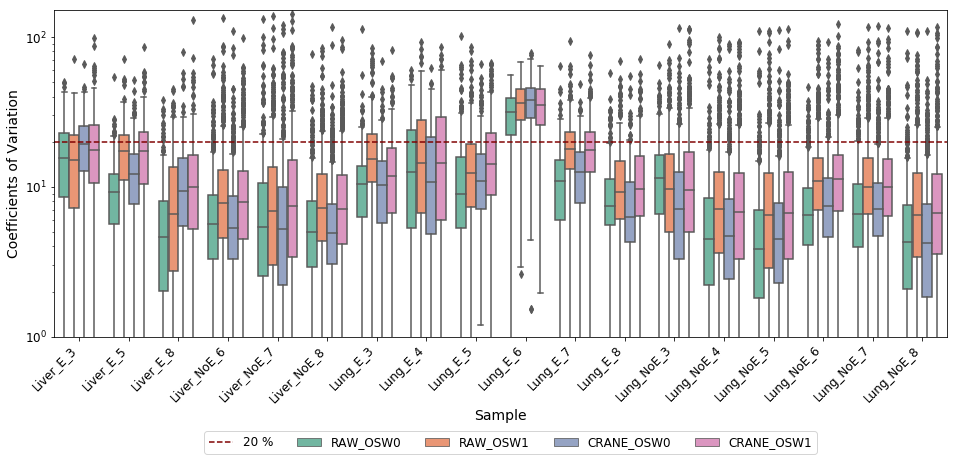

In [48]:
fig, axs = plt.subplots(1, 1, figsize=(16, 6))
sns.boxplot(
    data=all_protein_cv,
    x='Group_by',
    y='CV',
    hue='Type',
    hue_order=hue_order,
    palette=palette,
    ax=axs,
)
# axs.set_title('Protein Coefficients of Variation')
axs.set_xlabel('Sample')
axs.set_ylabel('Coefficients of Variation')
axs.set_yscale('log')
axs.axhline(20, ls='--', c='maroon', label='20 %')
axs.set_ylim((1, 150))
axs.tick_params('x', labelrotation=45) 
for tick in axs.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("right")
axs.legend(bbox_to_anchor=(0.25,-0.08), loc="upper left",  bbox_transform=fig.transFigure, ncol = 5)
plt.savefig('figures/Matrisome_Protein_CV.eps', dpi=350, format='eps', bbox_inches='tight')

## Compare number of protein IDs

In [49]:
protein_count = all_protein_data.groupby(['Type', 'Specimen', 'Sample', 'Bio_Replicate', 'Tech_Replicate'])[['Intensity (log2)']].count().reset_index()
protein_count.rename(columns={'Intensity (log2)': 'protein_count'}, inplace=True)
protein_count['Group_by'] = protein_count['Specimen'] + '_' + protein_count['Sample'] + '_' + protein_count['Bio_Replicate'].astype(str)
protein_count = protein_count.sort_values(by=['Group_by', 'Type', 'Tech_Replicate'])
protein_count.head()

,Type,Specimen,Sample,Bio_Replicate,Tech_Replicate,protein_count,Group_by
0,CRANE_OSW0,Liver,E,3,1,254,Liver_E_3
1,CRANE_OSW0,Liver,E,3,3,183,Liver_E_3
50,CRANE_OSW1,Liver,E,3,1,256,Liver_E_3
51,CRANE_OSW1,Liver,E,3,3,195,Liver_E_3
100,RAW_OSW0,Liver,E,3,1,231,Liver_E_3


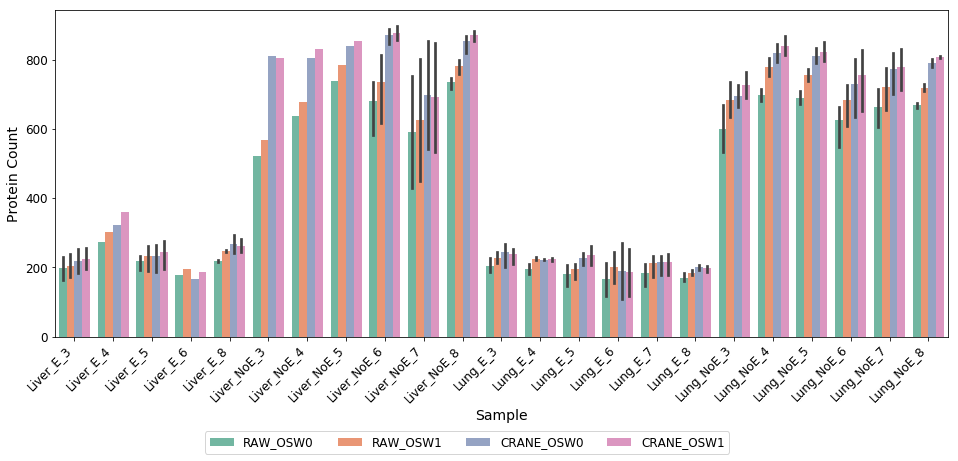

In [50]:
fig, axs = plt.subplots(1, 1, figsize=(16, 6))
sns.barplot(
    data=protein_count,
    x='Group_by',
    y='protein_count',
    hue='Type',
    hue_order=hue_order,
    palette=palette,
    ax=axs,
)
# axs.set_title('Protein Count')
axs.set_xlabel('Sample')
axs.set_ylabel('Protein Count')
axs.tick_params('x', labelrotation=45)
for tick in axs.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("right")
axs.legend(bbox_to_anchor=(0.25,-0.08), loc="upper left",  bbox_transform=fig.transFigure, ncol = 4)
plt.savefig('figures/Matrisome_Protein_Count.eps', dpi=350, format='eps', bbox_inches='tight')

In [51]:
Protein_Detection_Improvement = pd.DataFrame(columns=['Type', 'Specimen', 'Sample', 'Bio_Replicate', 'Tech_Replicate', 'Ref_Protein_Count', 'Protein_Count', 'Protein_Detection_Improvement'])
protein_count['Group_by'] = protein_count['Group_by'] + '_' + protein_count['Tech_Replicate'].astype(str)
group_list = protein_count.Group_by.unique().tolist()
for group in group_list:
    temp = protein_count.loc[protein_count.Group_by == group]
    if temp.loc[temp.Type == Reference].shape[0] > 0:
        ref_count = temp.loc[temp.Type == Reference]['protein_count'].values.tolist()[0]
        type_list = temp.Type.unique().tolist()
        for typ in type_list:
            if typ != Reference:
                temp2 = temp.loc[temp.Type == typ]
                if temp2.shape[0] > 0:
                    count = temp2['protein_count'].values.tolist()[0]
                    protein_improvement = (count - ref_count)/ref_count * 100
                    Protein_Detection_Improvement = Protein_Detection_Improvement.append(
                        {
                            'Type': typ,
                            'Specimen' :temp.Specimen.tolist()[0],
                            'Sample':temp.Sample.tolist()[0],
                            'Bio_Replicate':temp.Bio_Replicate.tolist()[0],
                            'Tech_Replicate':temp.Tech_Replicate.tolist()[0],
                            'Ref_Protein_Count': ref_count,
                            'Protein_Count': count,
                            'Protein_Detection_Improvement':protein_improvement
                        },
                        ignore_index=True
                    )
Protein_Detection_Improvement['Group_by'] = Protein_Detection_Improvement['Specimen'] + '_' + Protein_Detection_Improvement['Sample'] + '_' + Protein_Detection_Improvement['Bio_Replicate'].astype(str)

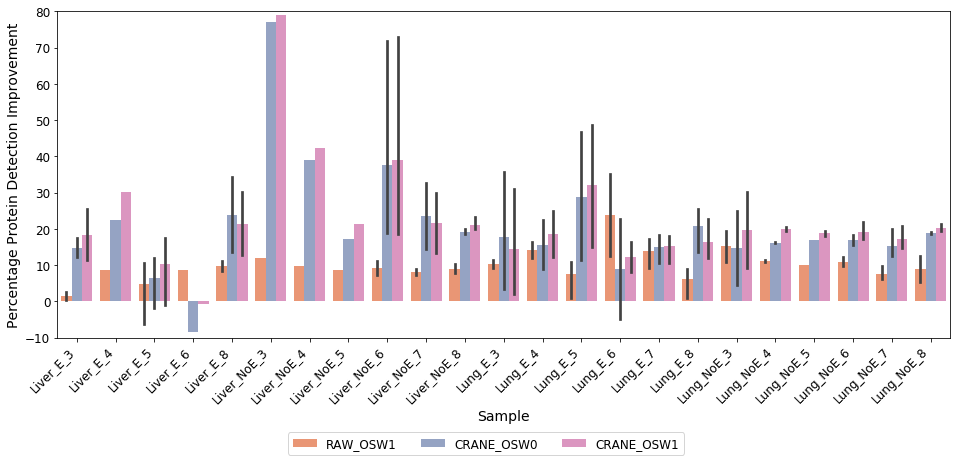

In [52]:
fig, axs = plt.subplots(1, 1, figsize=(16, 6))

sns.barplot(
    data=Peptide_Detection_Improvement,
    x='Group_by',
    y='Peptide_Detection_Improvement',
    hue='Type',
    hue_order=hue_order_less_ref,
    palette=palette_less_ref,
    ax=axs,
)
axs.set_ylim((-10, 80))
axs.set_xlabel('Sample')
axs.set_ylabel('Percentage Protein Detection Improvement')
axs.tick_params('x', labelrotation=45)
for tick in axs.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("right")
axs.legend(bbox_to_anchor=(0.32,-0.08), loc="upper left",  bbox_transform=fig.transFigure, ncol = 4)
plt.savefig('figures/Matrisome_Protein_Detection_Improvement.eps', dpi=350, format='eps', bbox_inches='tight')

## Compare ECM number of protein IDs

In [53]:
all_protein_data['Protein_entry'] = all_protein_data.Protein.str.split('|').str[1]
# Glycoproteins
all_protein_data.loc[all_protein_data.Protein_entry.isin(Glycoproteins_list),'Gene_Type'] = 'Glycoproteins'
# Collagens
all_protein_data.loc[all_protein_data.Protein_entry.isin(Collagens_list),'Gene_Type'] = 'Collagens'
# Proteoglycans
all_protein_data.loc[all_protein_data.Protein_entry.isin(Proteoglycans_list),'Gene_Type'] = 'Proteoglycans'
# Affiliated
all_protein_data.loc[all_protein_data.Protein_entry.isin(Affiliated_list),'Gene_Type'] = 'Affiliated'
# Regulators
all_protein_data.loc[all_protein_data.Protein_entry.isin(Regulators_list),'Gene_Type'] = 'Regulators'
# Secreted factors
all_protein_data.loc[all_protein_data.Protein_entry.isin(Secreted_factors_list),'Gene_Type'] = 'Secreted_factors'
ECM_protein_data = all_protein_data.loc[all_protein_data.Gene_Type.isin(['Glycoproteins', 'Collagens', 'Proteoglycans'])]
ECM_protein_data.head()

,Intensity,Protein,Type,sample_key,Tech_Replicate,Sample,Specimen,Bio_Replicate,Intensity (log2),Protein_entry,Gene_Type
81,0.029150,sp|P08122|CO4A2_MOUSE,CRANE_OSW0,20171126_SWATH_LI3_NoE_R1,1,NoE,Liver,3,-5.100356,P08122,Collagens
95,0.136033,sp|P11087|CO1A1_MOUSE,CRANE_OSW0,20171126_SWATH_LI3_NoE_R1,1,NoE,Liver,3,-2.877976,P11087,Collagens
96,0.183689,sp|P11276|FINC_MOUSE,CRANE_OSW0,20171126_SWATH_LI3_NoE_R1,1,NoE,Liver,3,-2.444661,P11276,Glycoproteins
171,0.348787,sp|P28654|PGS2_MOUSE,CRANE_OSW0,20171126_SWATH_LI3_NoE_R1,1,NoE,Liver,3,-1.519582,P28654,Proteoglycans
340,0.168773,sp|Q01149|CO1A2_MOUSE,CRANE_OSW0,20171126_SWATH_LI3_NoE_R1,1,NoE,Liver,3,-2.566846,Q01149,Collagens


In [54]:
ECM_protein_count = ECM_protein_data.groupby(['Type', 'Specimen', 'Sample', 'Bio_Replicate', 'Tech_Replicate'])[['Intensity (log2)']].count().reset_index()
ECM_protein_count.rename(columns={'Intensity (log2)': 'ECM_protein_count'}, inplace=True)
ECM_protein_count['Group_by'] = ECM_protein_count['Specimen'] + '_' + ECM_protein_count['Sample'] + '_' + ECM_protein_count['Bio_Replicate'].astype(str)
ECM_protein_count = ECM_protein_count.sort_values(by=['Group_by', 'Type', 'Tech_Replicate'])
ECM_protein_count.head()

,Type,Specimen,Sample,Bio_Replicate,Tech_Replicate,ECM_protein_count,Group_by
0,CRANE_OSW0,Liver,E,3,1,29,Liver_E_3
1,CRANE_OSW0,Liver,E,3,3,23,Liver_E_3
50,CRANE_OSW1,Liver,E,3,1,29,Liver_E_3
51,CRANE_OSW1,Liver,E,3,3,23,Liver_E_3
100,RAW_OSW0,Liver,E,3,1,27,Liver_E_3


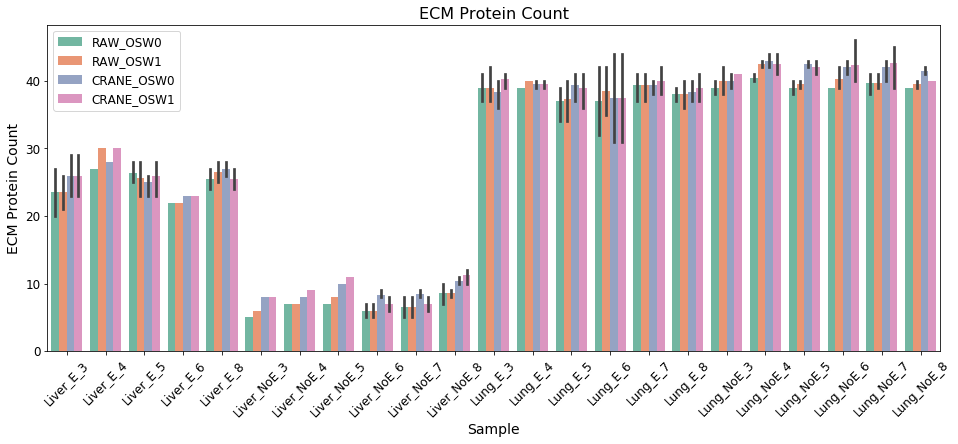

In [55]:
fig, axs = plt.subplots(1, 1, figsize=(16, 6))
sns.barplot(
    data=ECM_protein_count,
    x='Group_by',
    y='ECM_protein_count',
    hue='Type',
    hue_order=hue_order,
    palette=palette,
    ax=axs,
)
axs.set_title('ECM Protein Count')
axs.set_xlabel('Sample')
axs.set_ylabel('ECM Protein Count')
axs.legend(loc='upper left')
axs.tick_params('x', labelrotation=45)
plt.show()

In [56]:
ECM_Protein_Detection_Improvement = pd.DataFrame(columns=['Type', 'Specimen', 'Sample', 'Bio_Replicate', 'Tech_Replicate', 'Ref_Protein_Count', 'Protein_Count', 'ECM_Protein_Detection_Improvement'])
ECM_protein_count['Group_by'] = ECM_protein_count['Group_by'] + '_' + ECM_protein_count['Tech_Replicate'].astype(str)
group_list = ECM_protein_count.Group_by.unique().tolist()
for group in group_list:
    temp = ECM_protein_count.loc[ECM_protein_count.Group_by == group]
    if temp.loc[temp.Type == Reference].shape[0] > 0:
        ref_count = temp.loc[temp.Type == Reference]['ECM_protein_count'].values.tolist()[0]
        type_list = temp.Type.unique().tolist()
        for typ in type_list:
            if typ != Reference:
                temp2 = temp.loc[temp.Type == typ]
                if temp2.shape[0] > 0:
                    count = temp2['ECM_protein_count'].values.tolist()[0]
                    protein_improvement = (count - ref_count)/ref_count * 100
                    ECM_Protein_Detection_Improvement = ECM_Protein_Detection_Improvement.append(
                        {
                            'Type': typ,
                            'Specimen' :temp.Specimen.tolist()[0],
                            'Sample':temp.Sample.tolist()[0],
                            'Bio_Replicate':temp.Bio_Replicate.tolist()[0],
                            'Tech_Replicate':temp.Tech_Replicate.tolist()[0],
                            'Ref_Protein_Count': ref_count,
                            'Protein_Count': count,
                            'ECM_Protein_Detection_Improvement':protein_improvement
                        },
                        ignore_index=True
                    )
ECM_Protein_Detection_Improvement['Group_by'] = ECM_Protein_Detection_Improvement['Specimen'] + '_' + ECM_Protein_Detection_Improvement['Sample'] + '_' + ECM_Protein_Detection_Improvement['Bio_Replicate'].astype(str)

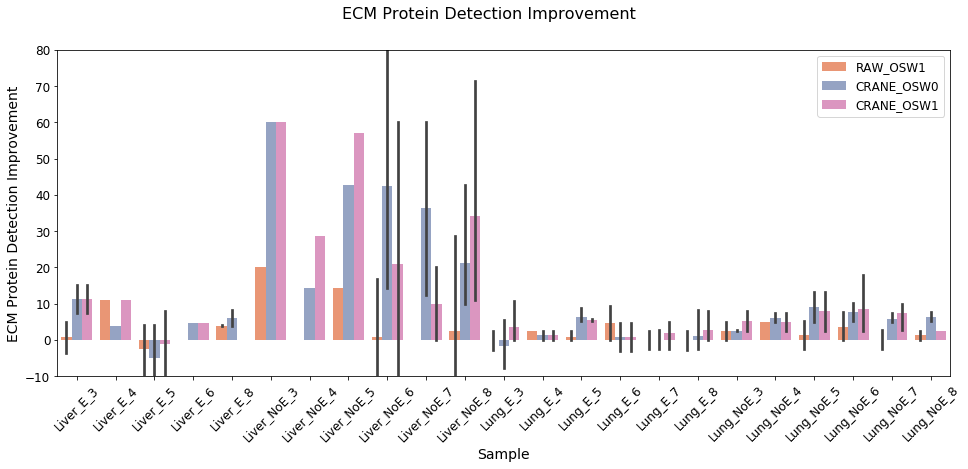

In [57]:
fig, axs = plt.subplots(1, 1, figsize=(16, 6))

sns.barplot(
    data=ECM_Protein_Detection_Improvement,
    x='Group_by',
    y='ECM_Protein_Detection_Improvement',
    hue='Type',
    hue_order=hue_order_less_ref,
    palette=palette_less_ref,
    ax=axs,
)
axs.set_ylim((-10, 80))
axs.set_xlabel('Sample')
axs.set_ylabel('ECM Protein Detection Improvement')
axs.tick_params('x', labelrotation=45)
axs.legend(loc='upper right')
plt.suptitle('ECM Protein Detection Improvement')
plt.show()

## Compare ECM Associated number of protein IDs

In [58]:
ECM_associated_protein_data = all_protein_data.loc[all_protein_data.Gene_Type.isin(['Affiliated', 'Regulators', 'Secreted_factors'])]
ECM_associated_protein_data.head()

,Intensity,Protein,Type,sample_key,Tech_Replicate,Sample,Specimen,Bio_Replicate,Intensity (log2),Protein_entry,Gene_Type
3,0.717242,sp|A6X935|ITIH4_MOUSE,CRANE_OSW0,20171126_SWATH_LI3_NoE_R1,1,NoE,Liver,3,-0.479468,A6X935,Regulators
8,0.775431,sp|O08573|LEG9_MOUSE,CRANE_OSW0,20171126_SWATH_LI3_NoE_R1,1,NoE,Liver,3,-0.366929,O08573,Affiliated
75,0.166234,sp|P07356|ANXA2_MOUSE,CRANE_OSW0,20171126_SWATH_LI3_NoE_R1,1,NoE,Liver,3,-2.588709,P07356,Affiliated
77,0.481146,sp|P07759|SPA3K_MOUSE,CRANE_OSW0,20171126_SWATH_LI3_NoE_R1,1,NoE,Liver,3,-1.055454,P07759,Regulators
119,0.784072,sp|P14824|ANXA6_MOUSE,CRANE_OSW0,20171126_SWATH_LI3_NoE_R1,1,NoE,Liver,3,-0.350942,P14824,Affiliated


In [59]:
ECM_associated_protein_count = ECM_associated_protein_data.groupby(['Type', 'Specimen', 'Sample', 'Bio_Replicate', 'Tech_Replicate'])[['Intensity (log2)']].count().reset_index()
ECM_associated_protein_count.rename(columns={'Intensity (log2)': 'ECM_associated_protein_count'}, inplace=True)
ECM_associated_protein_count['Group_by'] = ECM_associated_protein_count['Specimen'] + '_' + ECM_associated_protein_count['Sample'] + '_' + ECM_associated_protein_count['Bio_Replicate'].astype(str)
ECM_associated_protein_count = ECM_associated_protein_count.sort_values(by=['Group_by', 'Type', 'Tech_Replicate'])
ECM_associated_protein_count.head()

,Type,Specimen,Sample,Bio_Replicate,Tech_Replicate,ECM_associated_protein_count,Group_by
0,CRANE_OSW0,Liver,E,3,1,5,Liver_E_3
1,CRANE_OSW0,Liver,E,3,3,4,Liver_E_3
50,CRANE_OSW1,Liver,E,3,1,5,Liver_E_3
51,CRANE_OSW1,Liver,E,3,3,4,Liver_E_3
100,RAW_OSW0,Liver,E,3,1,4,Liver_E_3


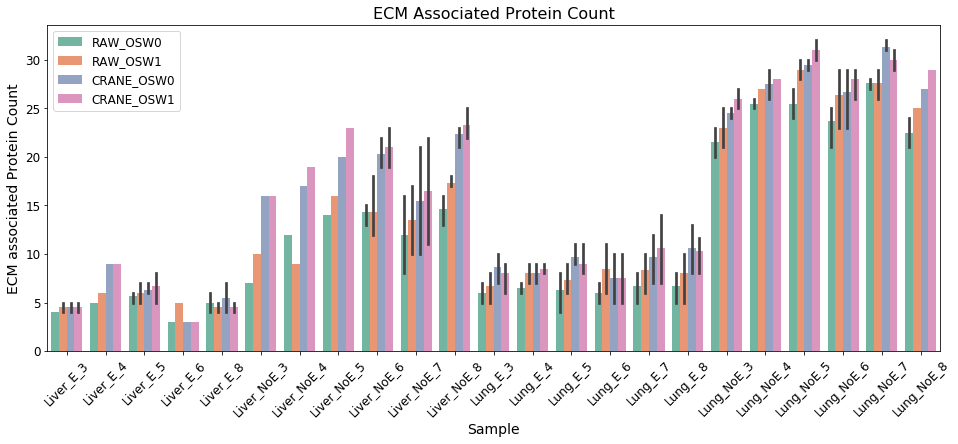

In [60]:
fig, axs = plt.subplots(1, 1, figsize=(16, 6))
sns.barplot(
    data=ECM_associated_protein_count,
    x='Group_by',
    y='ECM_associated_protein_count',
    hue='Type',
    hue_order=hue_order,
    palette=palette,
    ax=axs,
)
axs.set_title('ECM Associated Protein Count')
axs.set_xlabel('Sample')
axs.set_ylabel('ECM associated Protein Count')
axs.legend(loc='upper left')
axs.tick_params('x', labelrotation=45)
plt.show()

In [61]:
ECM_Associated_Protein_Detection_Improvement = pd.DataFrame(columns=['Type', 'Specimen', 'Sample', 'Bio_Replicate', 'Tech_Replicate', 'Ref_Protein_Count', 'Protein_Count', 'ECM_Associated_Protein_Detection_Improvement'])
ECM_associated_protein_count['Group_by'] = ECM_associated_protein_count['Group_by'] + '_' + ECM_associated_protein_count['Tech_Replicate'].astype(str)
group_list = ECM_associated_protein_count.Group_by.unique().tolist()
for group in group_list:
    temp = ECM_associated_protein_count.loc[ECM_associated_protein_count.Group_by == group]
    if temp.loc[temp.Type == Reference].shape[0] > 0:
        ref_count = temp.loc[temp.Type == Reference]['ECM_associated_protein_count'].values.tolist()[0]
        type_list = temp.Type.unique().tolist()
        for typ in type_list:
            if typ != Reference:
                temp2 = temp.loc[temp.Type == typ]
                if temp2.shape[0] > 0:
                    count = temp2['ECM_associated_protein_count'].values.tolist()[0]
                    protein_improvement = (count - ref_count)/ref_count * 100
                    ECM_Associated_Protein_Detection_Improvement = ECM_Associated_Protein_Detection_Improvement.append(
                        {
                            'Type': typ,
                            'Specimen' :temp.Specimen.tolist()[0],
                            'Sample':temp.Sample.tolist()[0],
                            'Bio_Replicate':temp.Bio_Replicate.tolist()[0],
                            'Tech_Replicate':temp.Tech_Replicate.tolist()[0],
                            'Ref_Protein_Count': ref_count,
                            'Protein_Count': count,
                            'ECM_Associated_Protein_Detection_Improvement':protein_improvement
                        },
                        ignore_index=True
                    )
ECM_Associated_Protein_Detection_Improvement['Group_by'] = ECM_Associated_Protein_Detection_Improvement['Specimen'] + '_' + ECM_Associated_Protein_Detection_Improvement['Sample'] + '_' + ECM_Associated_Protein_Detection_Improvement['Bio_Replicate'].astype(str)

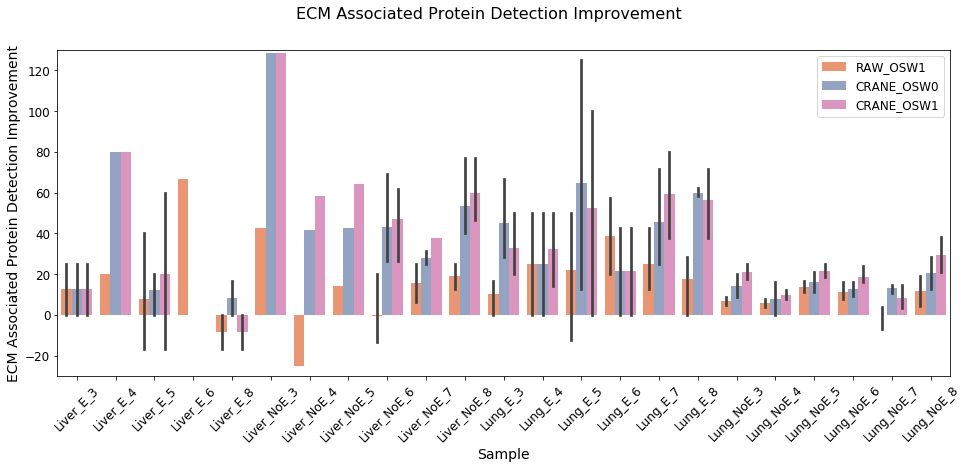

In [62]:
fig, axs = plt.subplots(1, 1, figsize=(16, 6))

sns.barplot(
    data=ECM_Associated_Protein_Detection_Improvement,
    x='Group_by',
    y='ECM_Associated_Protein_Detection_Improvement',
    hue='Type',
    hue_order=hue_order_less_ref,
    palette=palette_less_ref,
    ax=axs,
)
axs.set_ylim((-30, 130))
axs.set_xlabel('Sample')
axs.set_ylabel('ECM Associated Protein Detection Improvement')
axs.tick_params('x', labelrotation=45)
axs.legend(loc='upper right')
plt.suptitle('ECM Associated Protein Detection Improvement')
plt.show()

### Store protein count stats

In [63]:
median_protein_count = protein_count.groupby(['Type', 'Specimen', 'Sample'])[['protein_count']].median().reset_index()
median_protein_count.rename(columns={'protein_count': 'Median_Protein_Count'}, inplace=True)
protein_stats = median_protein_count

Median_Protein_Detection_Improvement = Protein_Detection_Improvement.groupby(['Type', 'Specimen', 'Sample'])[['Protein_Detection_Improvement']].median().reset_index()
Median_Protein_Detection_Improvement.rename(columns={'Protein_Detection_Improvement': 'Median_Protein_Detection_Improvement'}, inplace=True)
protein_stats = protein_stats.merge(Median_Protein_Detection_Improvement, how = 'left')

median_ECM_protein_count = ECM_protein_count.groupby(['Type', 'Specimen', 'Sample'])[['ECM_protein_count']].median().reset_index()
median_ECM_protein_count.rename(columns={'ECM_protein_count': 'Median_ECM_Protein_Count'}, inplace=True)
protein_stats = protein_stats.merge(median_ECM_protein_count, how = 'left')

Median_ECM_Protein_Detection_Improvement = ECM_Protein_Detection_Improvement.groupby(['Type', 'Specimen', 'Sample'])[['ECM_Protein_Detection_Improvement']].median().reset_index()
Median_ECM_Protein_Detection_Improvement.rename(columns={'ECM_Protein_Detection_Improvement': 'Median_ECM_Protein_Detection_Improvement'}, inplace=True)
protein_stats = protein_stats.merge(Median_ECM_Protein_Detection_Improvement, how = 'left')

median_associated_ECM_protein_count = ECM_associated_protein_count.groupby(['Type', 'Specimen', 'Sample'])[['ECM_associated_protein_count']].median().reset_index()
median_associated_ECM_protein_count.rename(columns={'ECM_associated_protein_count': 'Median_ECM_Associated_Protein_Count'}, inplace=True)
protein_stats = protein_stats.merge(median_associated_ECM_protein_count, how = 'left')

Median_ECM_Associated_Protein_Detection_Improvement = ECM_Associated_Protein_Detection_Improvement.groupby(['Type', 'Specimen', 'Sample'])[['ECM_Associated_Protein_Detection_Improvement']].median().reset_index()
Median_ECM_Associated_Protein_Detection_Improvement.rename(columns={'ECM_Associated_Protein_Detection_Improvement': 'Median_ECM_Associated_Protein_Detection_Improvement'}, inplace=True)
protein_stats = protein_stats.merge(Median_ECM_Associated_Protein_Detection_Improvement, how = 'left')
protein_stats.head()

,Type,Specimen,Sample,Median_Protein_Count,Median_Protein_Detection_Improvement,Median_ECM_Protein_Count,Median_ECM_Protein_Detection_Improvement,Median_ECM_Associated_Protein_Count,Median_ECM_Associated_Protein_Detection_Improvement
0,CRANE_OSW0,Liver,E,246.0,10.909091,26.0,4.000000,6.0,16.666667
1,CRANE_OSW0,Liver,NoE,845.0,17.456022,9.0,33.333333,20.0,41.666667
2,CRANE_OSW0,Lung,E,222.0,19.421144,39.5,1.282051,9.0,46.428571
3,CRANE_OSW0,Lung,NoE,790.5,17.525241,42.0,5.195682,28.5,13.392857
4,CRANE_OSW1,Liver,E,256.0,16.455696,27.0,4.545455,5.0,0.000000


In [64]:
protein_stats['Type_Sort'] = np.nan
protein_stats.loc[protein_stats.Type == 'RAW_OSW0', 'Type_Sort'] = 0
protein_stats.loc[protein_stats.Type == 'RAW_OSW1', 'Type_Sort'] = 1
protein_stats.loc[protein_stats.Type == 'CRANE_OSW0', 'Type_Sort'] = 2
protein_stats.loc[protein_stats.Type == 'CRANE_OSW1', 'Type_Sort'] = 3
protein_stats = protein_stats.sort_values(by=['Specimen', 'Sample', 'Type_Sort'])
protein_stats[
    ['Specimen', 'Sample', 'Type', 'Median_Protein_Count', 'Median_Protein_Detection_Improvement', 'Median_ECM_Protein_Count', 'Median_ECM_Protein_Detection_Improvement', 'Median_ECM_Associated_Protein_Count', 'Median_ECM_Associated_Protein_Detection_Improvement']
].round(1).to_csv("peptide_n_protein_data/stats/Matrisome_Protein_ID_data.csv")

## Differential analysis Lung vs Liver ECM enhanced Proteins

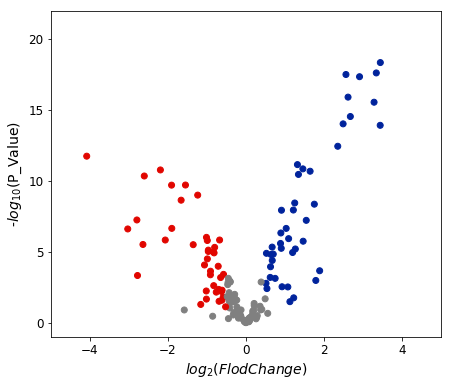

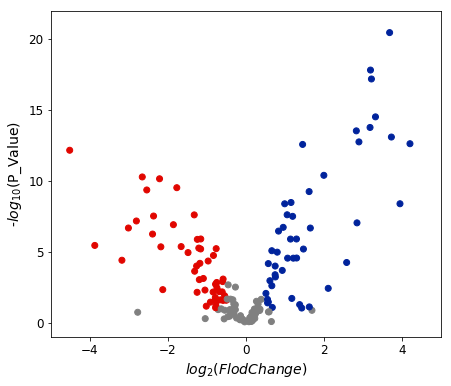

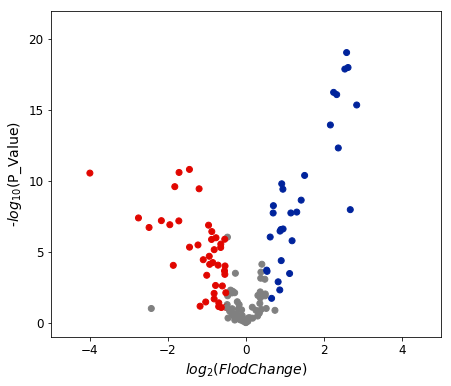

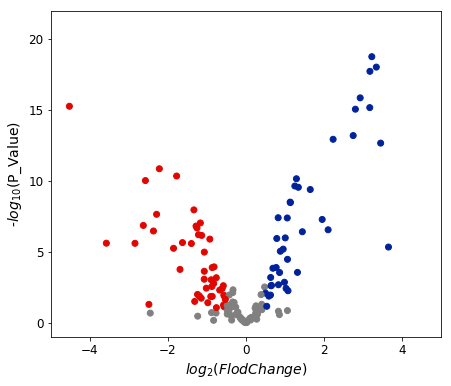

In [65]:
type_list = all_protein_data.Type.unique().tolist()
sample = 'E'
log2FC_threshold = 0.5
alpha = 0.1
for typ in type_list:
    subset = all_protein_data.loc[
        (all_protein_data.Type == typ) &
        (all_protein_data.Sample == sample) &
        (all_protein_data.Specimen == 'Lung')
    ]
    cols = ['sample_key']
    rows = ['Protein']
    lung_intensity = subset[rows + cols + ['Intensity (log2)']].set_index(rows + cols).unstack(cols)
    lung_intensity = lung_intensity.reset_index()
    lung_intensity.columns = lung_intensity.columns.droplevel()
    columns1 = list (lung_intensity.columns.values)
    columns1 = ['Protein'] + columns1[1:]
    lung_intensity.columns = columns1
    # Retain the rows with more than one detection
    lung_intensity['count'] = lung_intensity.count(axis=1)
    lung_intensity = lung_intensity.loc[lung_intensity['count'] > 2]
    lung_intensity.drop(columns=['count'], inplace=True)
    lung_intensity['value1'] = lung_intensity.mean(axis=1)
    lung_intensity = lung_intensity.dropna(subset=['value1'])

    subset = all_protein_data.loc[
        (all_protein_data.Type == typ) &
        (all_protein_data.Sample == sample) &
        (all_protein_data.Specimen == 'Liver')
    ]
    cols = ['sample_key']
    rows = ['Protein']
    liver_intensity = subset[rows + cols + ['Intensity (log2)']].set_index(rows + cols).unstack(cols)
    liver_intensity = liver_intensity.reset_index()
    liver_intensity.columns = liver_intensity.columns.droplevel()
    columns2 = list (liver_intensity.columns.values)
    columns2 = ['Protein'] + columns2[1:]
    liver_intensity.columns = columns2
    # Retain the rows with more than one detection
    liver_intensity['count'] = liver_intensity.count(axis=1)
    liver_intensity = liver_intensity.loc[liver_intensity['count'] > 2]
    liver_intensity.drop(columns=['count'], inplace=True)
    liver_intensity['value2'] = liver_intensity.mean(axis=1)
    liver_intensity = liver_intensity.dropna(subset=['value2'])
    
    lung_liver_intensities = pd.merge(
        lung_intensity,
        liver_intensity,
        left_on=['Protein'],
        right_on=['Protein'],
        how='inner'
    )
    
    # Calculate fold change
    lung_liver_intensities['log2FC'] = lung_liver_intensities['value1'] - lung_liver_intensities['value2']
    
    # Calculate P value
    lung_liver_intensities['rawpvalue'] = ttest_ind(
        lung_liver_intensities[columns1[1:]],
        lung_liver_intensities[columns2[1:]],
        axis=1,
        equal_var = False, # perform Welch’s t-test, which does not assume equal population variance
        nan_policy='omit'
    ).pvalue.data.tolist()
    
    # pvalue is NaN if there is only one entry in either one of the lists so drop them
    lung_liver_intensities = lung_liver_intensities.dropna(subset=['rawpvalue']) 
    
    lung_liver_intensities['p_value'] = -1*lung_liver_intensities.rawpvalue.apply(np.log10)
    
    lung_liver_intensities['category'] = 'insignificant'
    lung_liver_intensities.loc[(lung_liver_intensities.p_value > -1*np.log10(alpha)) & (lung_liver_intensities.log2FC > log2FC_threshold) ,'category'] = 'upregulated'
    lung_liver_intensities.loc[(lung_liver_intensities.p_value > -1*np.log10(alpha)) & (lung_liver_intensities.log2FC < -log2FC_threshold) ,'category'] = 'downregulated'

    fig, axs = plt.subplots(1, 1, figsize=(7, 6))
    colors = {'insignificant':'grey', 'upregulated':'#00239CFF', 'downregulated':'#E10600FF'}

    plt.scatter(
        lung_liver_intensities.log2FC.tolist(),
        lung_liver_intensities.p_value.tolist(),
        c=lung_liver_intensities['category'].map(colors)
    )
    axs.set_xlim((-5, 5))
    axs.set_ylim((-1, 22))
    axs.set_xlabel('$log_{2}(FlodChange)$')
    axs.set_ylabel('-$log_{10}$(P_Value)')
    plt.savefig('figures/Matrisome_Protein_Volcano_Lung_Liver_{}_{}.eps'.format(sample, typ), dpi=350, format='eps', bbox_inches='tight')
    
    lung_liver_intensities.loc[lung_liver_intensities.category != 'insignificant'].to_csv("peptide_n_protein_data/stats/Matrisome_Protein_Lung_Liver_Significant_Proteins_{}_{}.csv".format(sample, typ), index=False)

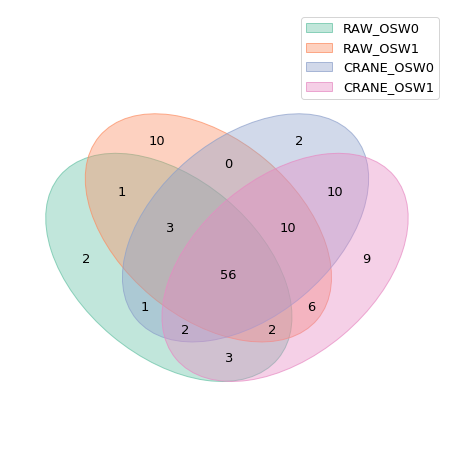

In [66]:
sample = 'E'
significant_proteins = {}
significant_proteins['RAW_OSW0'] = set(pd.read_csv("peptide_n_protein_data/stats/Matrisome_Protein_Lung_Liver_Significant_Proteins_{}_RAW_OSW0.csv".format(sample)).Protein.unique().tolist())
significant_proteins['RAW_OSW1'] = set(pd.read_csv("peptide_n_protein_data/stats/Matrisome_Protein_Lung_Liver_Significant_Proteins_{}_RAW_OSW1.csv".format(sample)).Protein.unique().tolist())
significant_proteins['CRANE_OSW0'] = set(pd.read_csv("peptide_n_protein_data/stats/Matrisome_Protein_Lung_Liver_Significant_Proteins_{}_CRANE_OSW0.csv".format(sample)).Protein.unique().tolist())
significant_proteins['CRANE_OSW1'] = set(pd.read_csv("peptide_n_protein_data/stats/Matrisome_Protein_Lung_Liver_Significant_Proteins_{}_CRANE_OSW1.csv".format(sample)).Protein.unique().tolist())
venn(significant_proteins, cmap=palette)

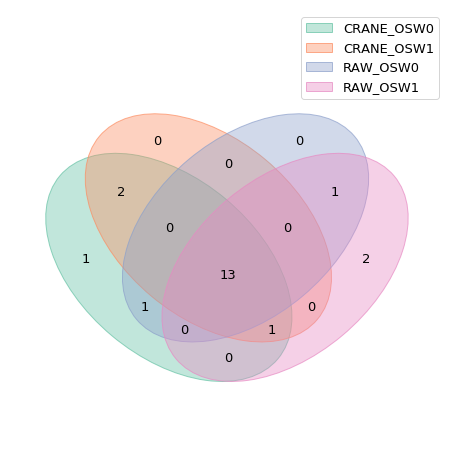

In [67]:
significant_ECM_proteins = {}
type_list = all_protein_data.Type.unique().tolist()
for typ in type_list:    
    significant_protain = pd.read_csv("peptide_n_protein_data/stats/Matrisome_Protein_Lung_Liver_Significant_Proteins_{}_{}.csv".format(sample, typ))
    significant_protain['Protein_entry'] = significant_protain.Protein.str.split('|').str[1]
    significant_protain.loc[significant_protain.Protein_entry.isin(Glycoproteins_list),'Gene_Type'] = 'Glycoproteins'
    significant_protain.loc[significant_protain.Protein_entry.isin(Collagens_list),'Gene_Type'] = 'Collagens'
    significant_protain.loc[significant_protain.Protein_entry.isin(Proteoglycans_list),'Gene_Type'] = 'Proteoglycans'
    significant_protain = significant_protain.dropna(subset=['Gene_Type']).Protein.unique().tolist()
    significant_ECM_proteins[typ] = set(significant_protain)
venn(significant_ECM_proteins, cmap=palette)

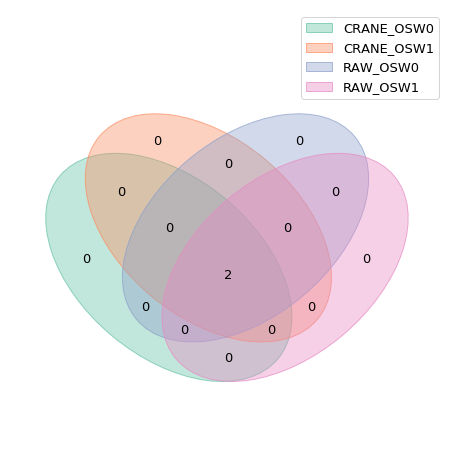

In [68]:
significant_ECM_associated_proteins = {}
type_list = all_protein_data.Type.unique().tolist()
for typ in type_list:    
    significant_protain = pd.read_csv("peptide_n_protein_data/stats/Matrisome_Protein_Lung_Liver_Significant_Proteins_{}_{}.csv".format(sample, typ))
    significant_protain['Protein_entry'] = significant_protain.Protein.str.split('|').str[1]
    significant_protain.loc[significant_protain.Protein_entry.isin(Affiliated_list),'Gene_Type'] = 'Affiliated'
    significant_protain.loc[significant_protain.Protein_entry.isin(Regulators_list),'Gene_Type'] = 'Regulators'
    significant_protain.loc[significant_protain.Protein_entry.isin(Secreted_factors_list),'Gene_Type'] = 'Secreted_factors'
    significant_protain = significant_protain.dropna(subset=['Gene_Type']).Protein.unique().tolist()
    significant_ECM_associated_proteins[typ] = set(significant_protain)
venn(significant_ECM_associated_proteins, cmap=palette)

## Differential analysis Lung vs Liver ECM NoE

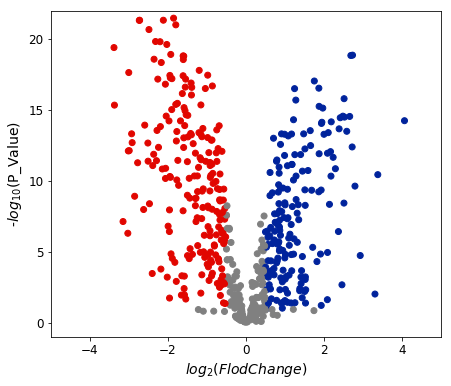

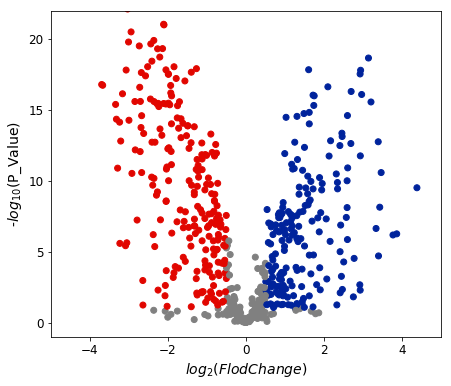

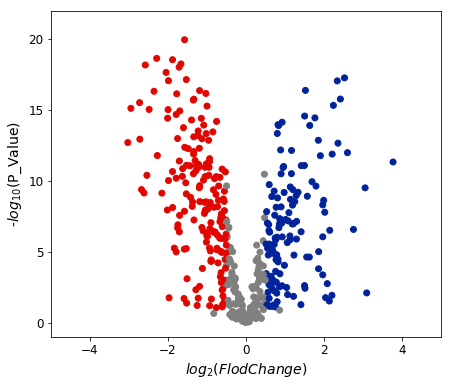

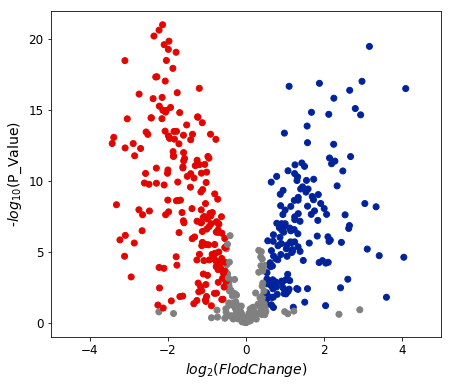

In [69]:
type_list = all_protein_data.Type.unique().tolist()
sample = 'NoE'
log2FC_threshold = 0.5
alpha = 0.1
for typ in type_list:
    subset = all_protein_data.loc[
        (all_protein_data.Type == typ) &
        (all_protein_data.Sample == sample) &
        (all_protein_data.Specimen == 'Lung')
    ]
    cols = ['sample_key']
    rows = ['Protein']
    lung_intensity = subset[rows + cols + ['Intensity (log2)']].set_index(rows + cols).unstack(cols)
    lung_intensity = lung_intensity.reset_index()
    lung_intensity.columns = lung_intensity.columns.droplevel()
    columns1 = list (lung_intensity.columns.values)
    columns1 = ['Protein'] + columns1[1:]
    lung_intensity.columns = columns1
    # Retain the rows with more than one detection
    lung_intensity['count'] = lung_intensity.count(axis=1)
    lung_intensity = lung_intensity.loc[lung_intensity['count'] > 2]
    lung_intensity.drop(columns=['count'], inplace=True)
    lung_intensity['value1'] = lung_intensity.mean(axis=1)
    lung_intensity = lung_intensity.dropna(subset=['value1'])

    subset = all_protein_data.loc[
        (all_protein_data.Type == typ) &
        (all_protein_data.Sample == sample) &
        (all_protein_data.Specimen == 'Liver')
    ]
    cols = ['sample_key']
    rows = ['Protein']
    liver_intensity = subset[rows + cols + ['Intensity (log2)']].set_index(rows + cols).unstack(cols)
    liver_intensity = liver_intensity.reset_index()
    liver_intensity.columns = liver_intensity.columns.droplevel()
    columns2 = list (liver_intensity.columns.values)
    columns2 = ['Protein'] + columns2[1:]
    liver_intensity.columns = columns2
    # Retain the rows with more than one detection
    liver_intensity['count'] = liver_intensity.count(axis=1)
    liver_intensity = liver_intensity.loc[liver_intensity['count'] > 2]
    liver_intensity.drop(columns=['count'], inplace=True)
    liver_intensity['value2'] = liver_intensity.mean(axis=1)
    liver_intensity = liver_intensity.dropna(subset=['value2'])
    
    lung_liver_intensities = pd.merge(
        lung_intensity,
        liver_intensity,
        left_on=['Protein'],
        right_on=['Protein'],
        how='inner'
    )
    
    # Calculate fold change
    lung_liver_intensities['log2FC'] = lung_liver_intensities['value1'] - lung_liver_intensities['value2']
    
    # Calculate P value
    lung_liver_intensities['rawpvalue'] = ttest_ind(
        lung_liver_intensities[columns1[1:]],
        lung_liver_intensities[columns2[1:]],
        axis=1,
        equal_var = False, # perform Welch’s t-test, which does not assume equal population variance
        nan_policy='omit'
    ).pvalue.data.tolist()
    
    # pvalue is NaN if there is only one entry in either one of the lists so drop them
    lung_liver_intensities = lung_liver_intensities.dropna(subset=['rawpvalue']) 
    
    lung_liver_intensities['p_value'] = -1*lung_liver_intensities.rawpvalue.apply(np.log10)
    
    lung_liver_intensities['category'] = 'insignificant'
    lung_liver_intensities.loc[(lung_liver_intensities.p_value > -1*np.log10(alpha)) & (lung_liver_intensities.log2FC > log2FC_threshold) ,'category'] = 'upregulated'
    lung_liver_intensities.loc[(lung_liver_intensities.p_value > -1*np.log10(alpha)) & (lung_liver_intensities.log2FC < -log2FC_threshold) ,'category'] = 'downregulated'
    
    fig, axs = plt.subplots(1, 1, figsize=(7, 6))
    colors = {'insignificant':'grey', 'upregulated':'#00239CFF', 'downregulated':'#E10600FF'}

    axs.scatter(
        lung_liver_intensities.log2FC.tolist(),
        lung_liver_intensities.p_value.tolist(),
        c=lung_liver_intensities['category'].map(colors)
    )

    axs.set_xlim((-5, 5))
    axs.set_ylim((-1, 22))
    axs.set_xlabel('$log_{2}(FlodChange)$')
    axs.set_ylabel('-$log_{10}$(P_Value)')
    plt.savefig('figures/Matrisome_Protein_Volcano_Lung_Liver_{}_{}.eps'.format(sample, typ), dpi=350, format='eps', bbox_inches='tight')
    
    lung_liver_intensities.loc[lung_liver_intensities.category != 'insignificant'].to_csv("peptide_n_protein_data/stats/Matrisome_Protein_Lung_Liver_Significant_Proteins_{}_{}.csv".format(sample, typ), index=False)

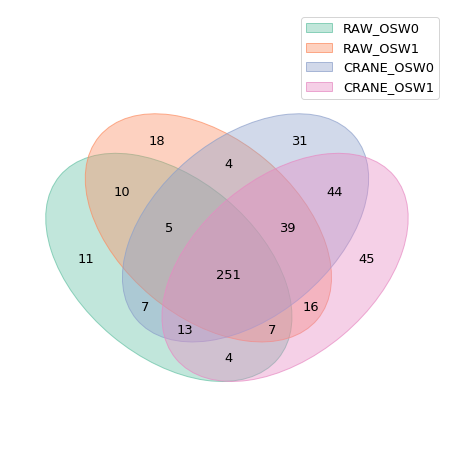

In [70]:
sample = 'NoE'
significant_proteins = {}
significant_proteins['RAW_OSW0'] = set(pd.read_csv("peptide_n_protein_data/stats/Matrisome_Protein_Lung_Liver_Significant_Proteins_{}_RAW_OSW0.csv".format(sample)).Protein.unique().tolist())
significant_proteins['RAW_OSW1'] = set(pd.read_csv("peptide_n_protein_data/stats/Matrisome_Protein_Lung_Liver_Significant_Proteins_{}_RAW_OSW1.csv".format(sample)).Protein.unique().tolist())
significant_proteins['CRANE_OSW0'] = set(pd.read_csv("peptide_n_protein_data/stats/Matrisome_Protein_Lung_Liver_Significant_Proteins_{}_CRANE_OSW0.csv".format(sample)).Protein.unique().tolist())
significant_proteins['CRANE_OSW1'] = set(pd.read_csv("peptide_n_protein_data/stats/Matrisome_Protein_Lung_Liver_Significant_Proteins_{}_CRANE_OSW1.csv".format(sample)).Protein.unique().tolist())
venn(significant_proteins, cmap=palette)

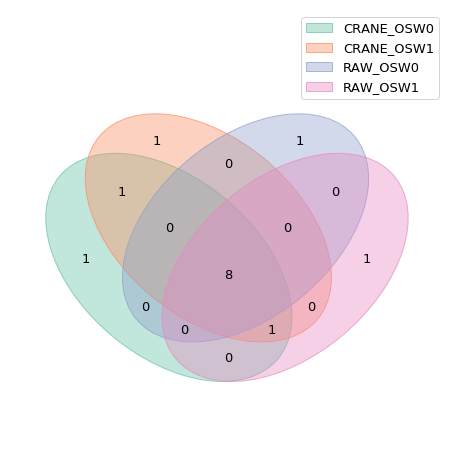

In [71]:
significant_ECM_proteins = {}
type_list = all_protein_data.Type.unique().tolist()
for typ in type_list:    
    significant_protain = pd.read_csv("peptide_n_protein_data/stats/Matrisome_Protein_Lung_Liver_Significant_Proteins_{}_{}.csv".format(sample, typ))
    significant_protain['Protein_entry'] = significant_protain.Protein.str.split('|').str[1]
    significant_protain.loc[significant_protain.Protein_entry.isin(Glycoproteins_list),'Gene_Type'] = 'Glycoproteins'
    significant_protain.loc[significant_protain.Protein_entry.isin(Collagens_list),'Gene_Type'] = 'Collagens'
    significant_protain.loc[significant_protain.Protein_entry.isin(Proteoglycans_list),'Gene_Type'] = 'Proteoglycans'
    significant_protain = significant_protain.dropna(subset=['Gene_Type']).Protein.unique().tolist()
    significant_ECM_proteins[typ] = set(significant_protain)
venn(significant_ECM_proteins, cmap=palette)

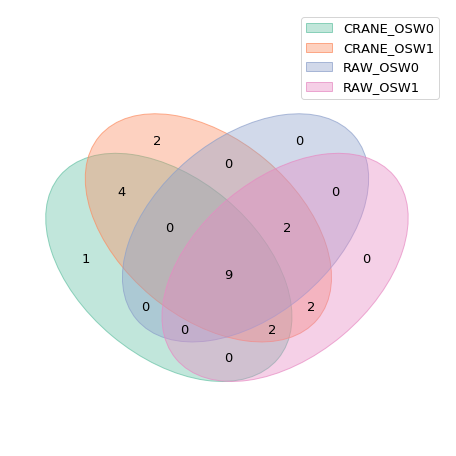

In [72]:
significant_ECM_associated_proteins = {}
type_list = all_protein_data.Type.unique().tolist()
for typ in type_list:    
    significant_protain = pd.read_csv("peptide_n_protein_data/stats/Matrisome_Protein_Lung_Liver_Significant_Proteins_{}_{}.csv".format(sample, typ))
    significant_protain['Protein_entry'] = significant_protain.Protein.str.split('|').str[1]
    significant_protain.loc[significant_protain.Protein_entry.isin(Affiliated_list),'Gene_Type'] = 'Affiliated'
    significant_protain.loc[significant_protain.Protein_entry.isin(Regulators_list),'Gene_Type'] = 'Regulators'
    significant_protain.loc[significant_protain.Protein_entry.isin(Secreted_factors_list),'Gene_Type'] = 'Secreted_factors'
    significant_protain = significant_protain.dropna(subset=['Gene_Type']).Protein.unique().tolist()
    significant_ECM_associated_proteins[typ] = set(significant_protain)
venn(significant_ECM_associated_proteins, cmap=palette)